# **Import Libraries**

In [75]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# **Import Dataset**

In [76]:
dataset = pd.read_csv("/content/Updated_Obesity_Dataset.csv")
dataset.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


# **Dataset Summary**

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2100 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2090 non-null   float64
 11  family_history_with_overweight  2090 non-null   object 
 12  FAF                             21

# **Dimension of the Dataset**

In [78]:
dataset.shape

(2111, 17)

# **Fetch all the Output Categories**

In [79]:
dataset["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

# **Unique Values of Each Column**

In [80]:
dataset.nunique()

,0
Age,1402
Gender,2
Height,1574
Weight,1525
CALC,4
FAVC,2
FCVC,810
NCP,635
SCC,2
SMOKE,2


# **Fetching Object Type Columns**

In [81]:
dataset.select_dtypes(include="object").columns

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# **Fetching Numeric Type Columns**

In [82]:
dataset.select_dtypes(include="float64").columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

# **Splitting Categorical & Numerical Columns**

In [83]:
categorical_column = ["Gender","CALC","FAVC",
                      "SCC","SMOKE","family_history_with_overweight",
                      "CAEC","MATRNS","NObeyesdad"]

numerical_column = ["Age","Height","Weight",
                    "FCVC","NCP","CH2O","FAF","TUE"]

# **COUNT | MEAN | Standard deviation | MIN | MAX | SPLITTING DATA IN 3 PARTS**

In [84]:
numerical_DATA = dataset.select_dtypes(include='number')
numerical_DATA.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2090.0,2.009034,0.613164,1.00,1.582010,2.000000,2.479917,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


# **Varience of The Data**

In [85]:
numerical_DATA.var()

,0
Age,40.271313
Height,0.008706
Weight,685.977477
FCVC,0.285078
NCP,0.605344
CH2O,0.375970
FAF,0.723507
TUE,0.370792


# **Skew in Numerical Features**

In [86]:
numerical_DATA.skew()

,0
Age,1.529100
Height,-0.012855
Weight,0.255410
FCVC,-0.432906
NCP,-1.107097
CH2O,-0.103338
FAF,0.498490
TUE,0.618502


# **Visual Representation of The Data via Histogram**

<ipython-input-87-eadd3a0de13b>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  numerical_DATA.hist(bins=50, ax=ax)


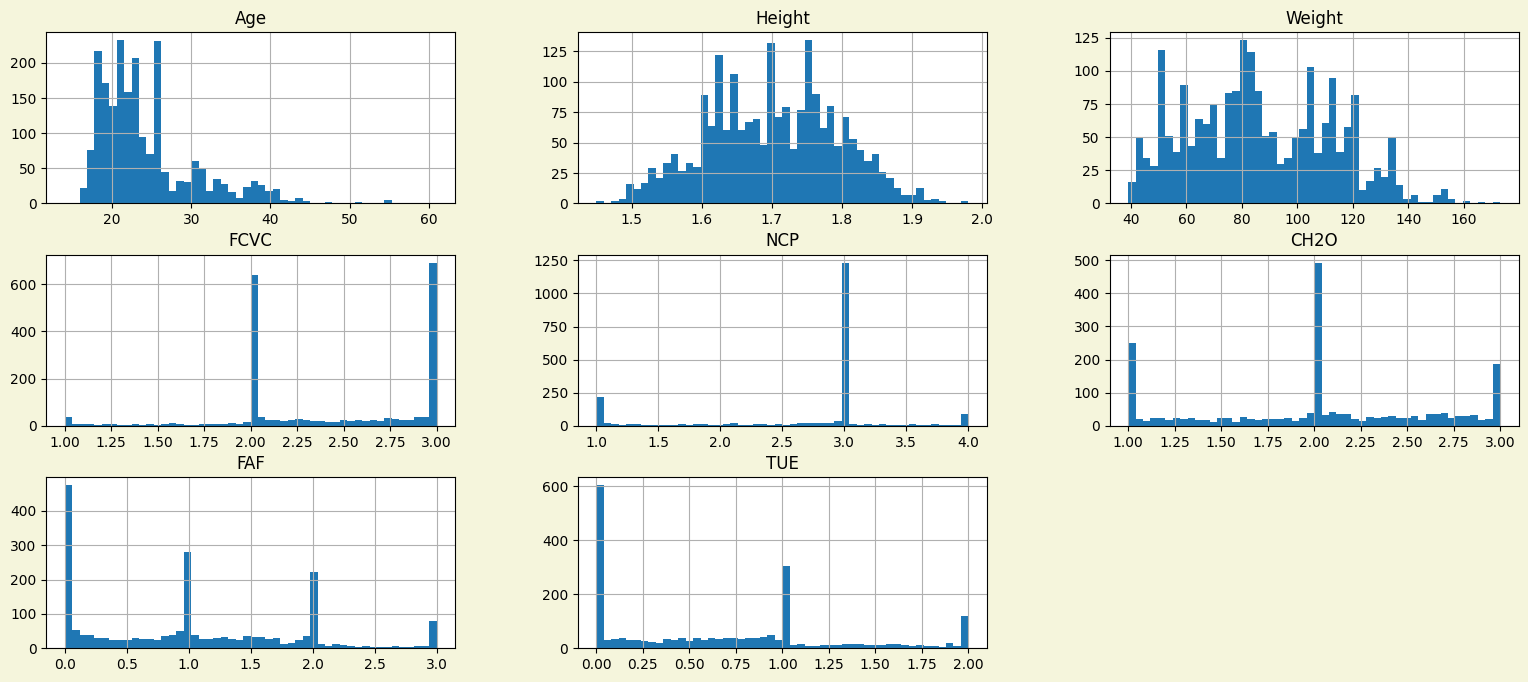

In [87]:
fig, ax = plt.subplots(figsize=(19, 8), facecolor='beige')
numerical_DATA.hist(bins=50, ax=ax)
ax.set_facecolor('green')
plt.show()

# **Density Graph**

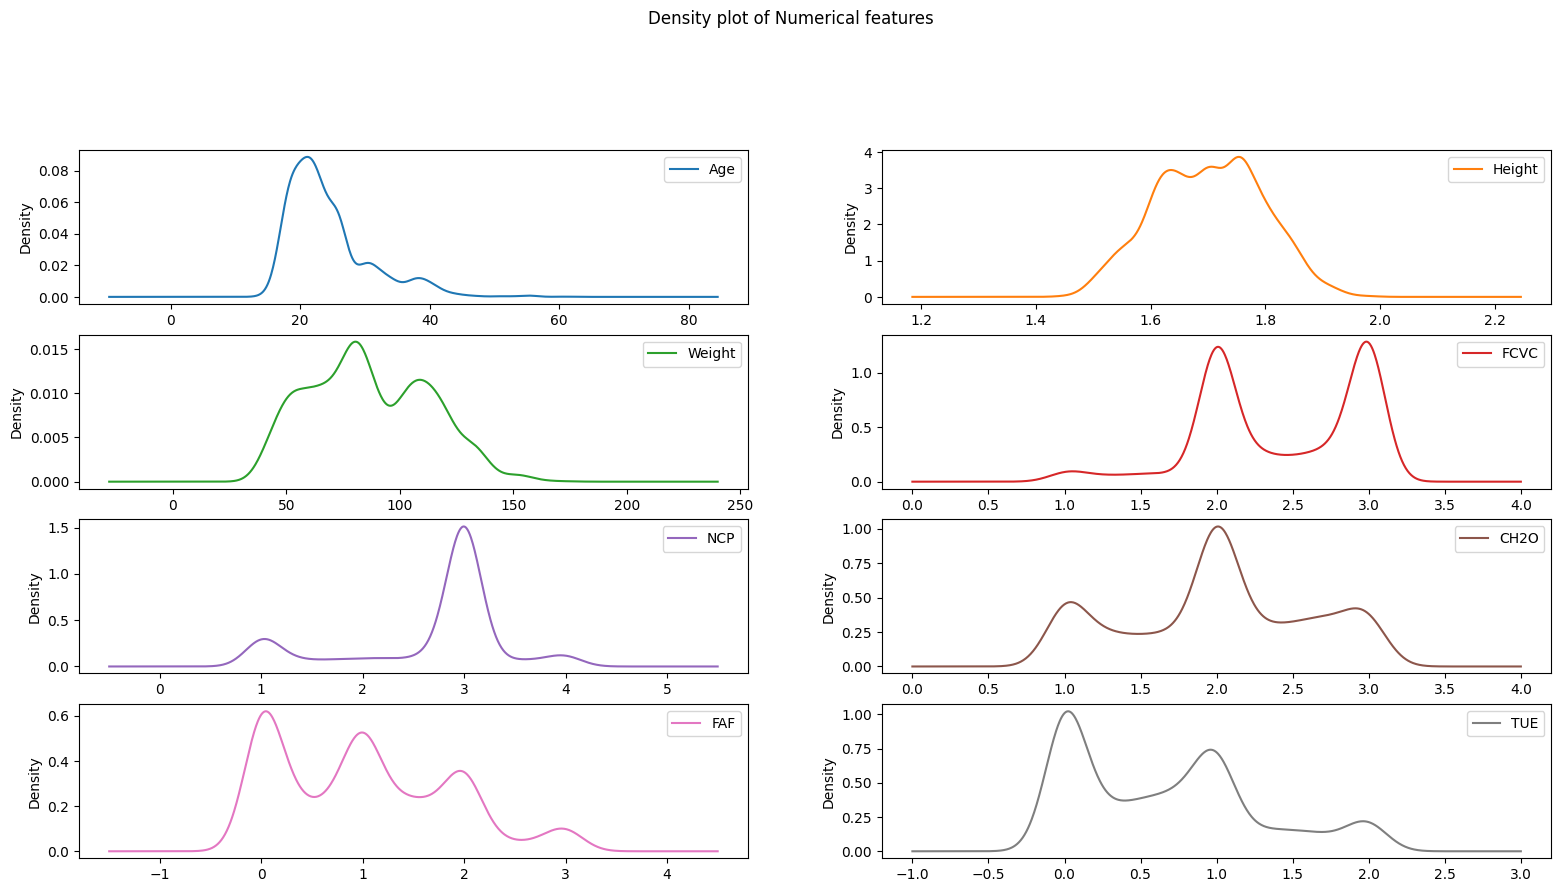

In [88]:
numerical_DATA = dataset.select_dtypes(include= 'number')
numerical_DATA.plot(kind='density',figsize=(19,14),subplots=True,layout=(6,2),title="Density plot of Numerical features", sharex = False)
plt.show()

# **Box Plot**

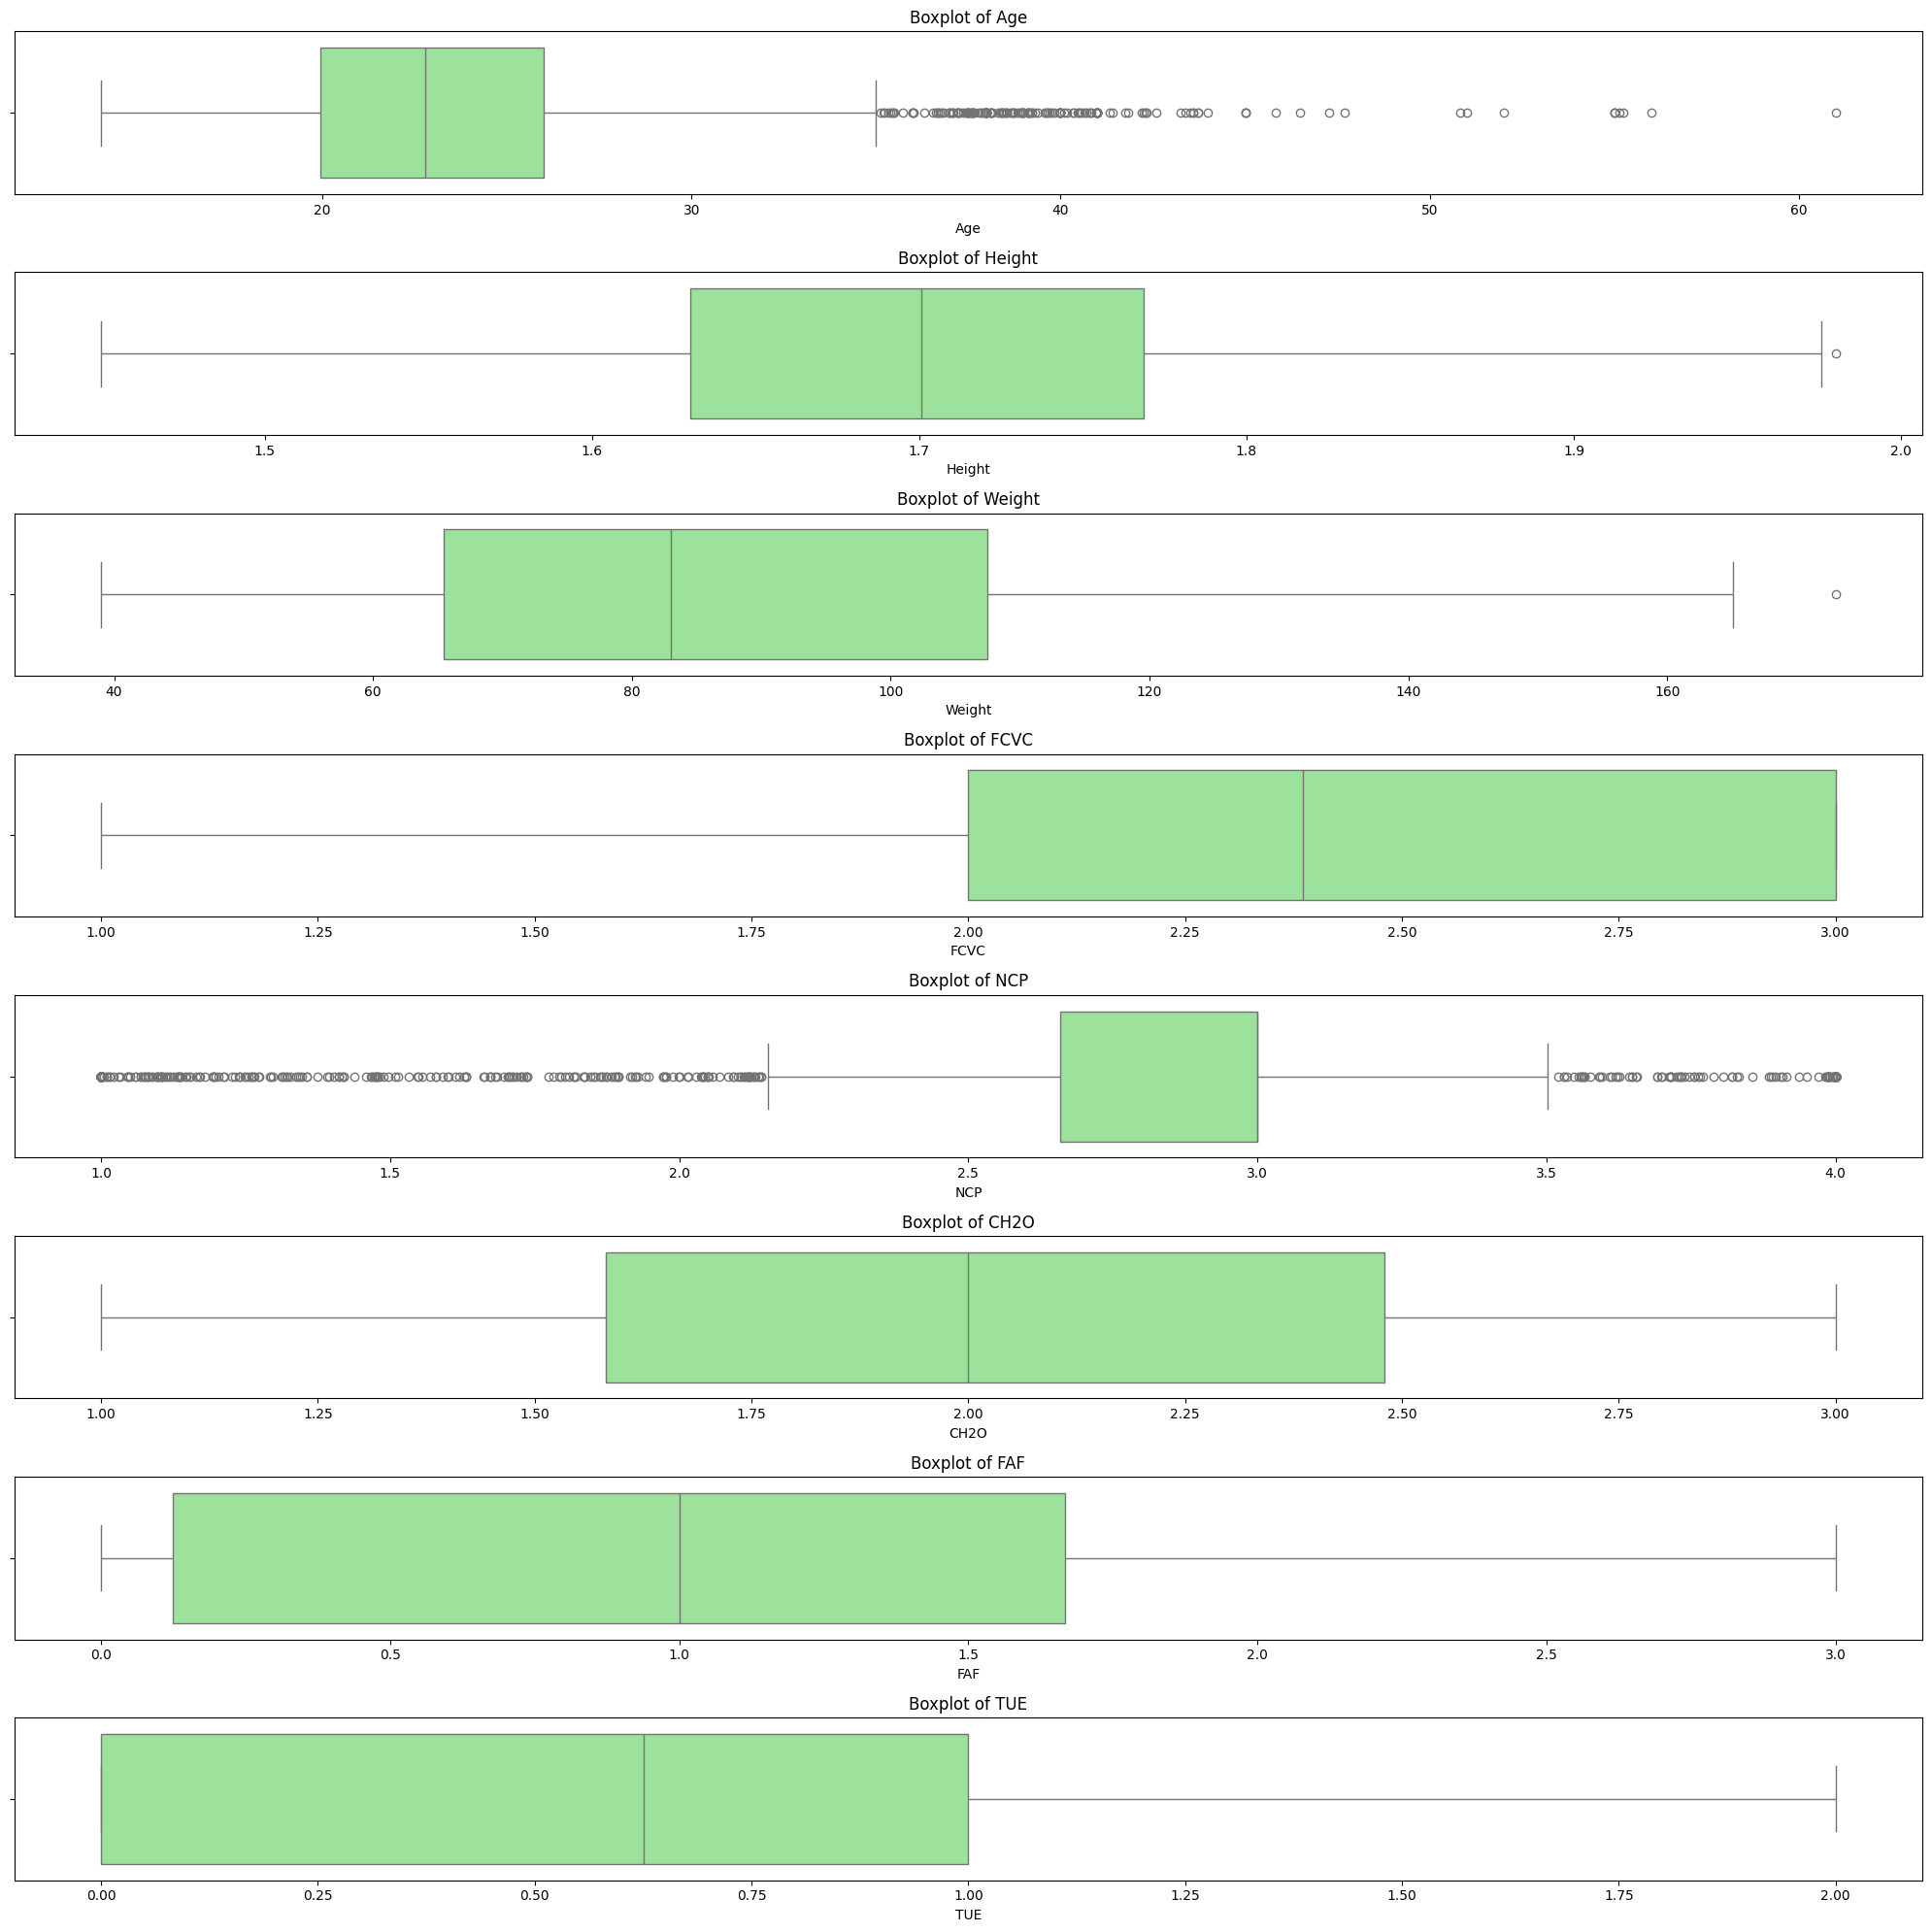

In [89]:
box = dataset.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(box, 1):
    plt.subplot(len(box), 1, i)
    sns.boxplot(x=dataset[col], color='lightgreen')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

# **Data Distribution of Output Column**

In [90]:
class_counts = dataset['NObeyesdad'].value_counts()
print(class_counts)

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [91]:
!pip install imbalanced-learn

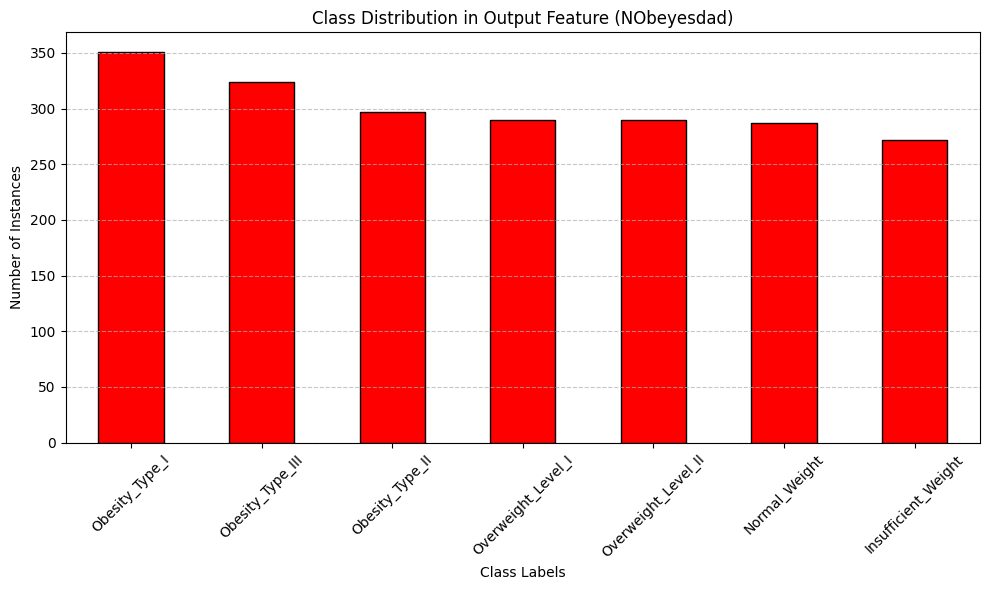

In [92]:
class_counts = dataset['NObeyesdad'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Class Distribution in Output Feature (NObeyesdad)')
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **COUNT | UNIQUE | TOP | FREQUENCY**

In [93]:
categorical_DATA = dataset.select_dtypes(include = 'object')
categorical_DATA.describe().T

,count,unique,top,freq
Gender,2100,2,Male,1065
CALC,2111,4,Sometimes,1401
FAVC,2111,2,yes,1866
SCC,2111,2,no,2015
SMOKE,2111,2,no,2067
family_history_with_overweight,2090,2,yes,1706
CAEC,2111,4,Sometimes,1765
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


# **Total NULL Values of Each Columns**

In [94]:
dataset.isnull().sum()

,0
Age,0
Gender,11
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [95]:
NULL = dataset.isnull().sum().sum()
print(f"Total NULL Values: {NULL}")

Total NULL Values: 53


# **Replace The NULL Values With The Highest Frequency Data For Object Datatype**

In [96]:
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

<ipython-input-96-5fdc3f191dc4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0], inplace=True)


# **Replace The NULL Values With The Mean Value For Numeric Datatype**

In [97]:
simpleimputer = SimpleImputer(strategy="mean")
dataset[numerical_column] = simpleimputer.fit_transform(dataset[numerical_column])
dataset.to_csv("dataset.csv", index=False)

In [98]:
NULL = dataset.isnull().sum().sum()
print(f"Total NULL Values: {NULL}")

Total NULL Values: 0


# **Detect Outliers**

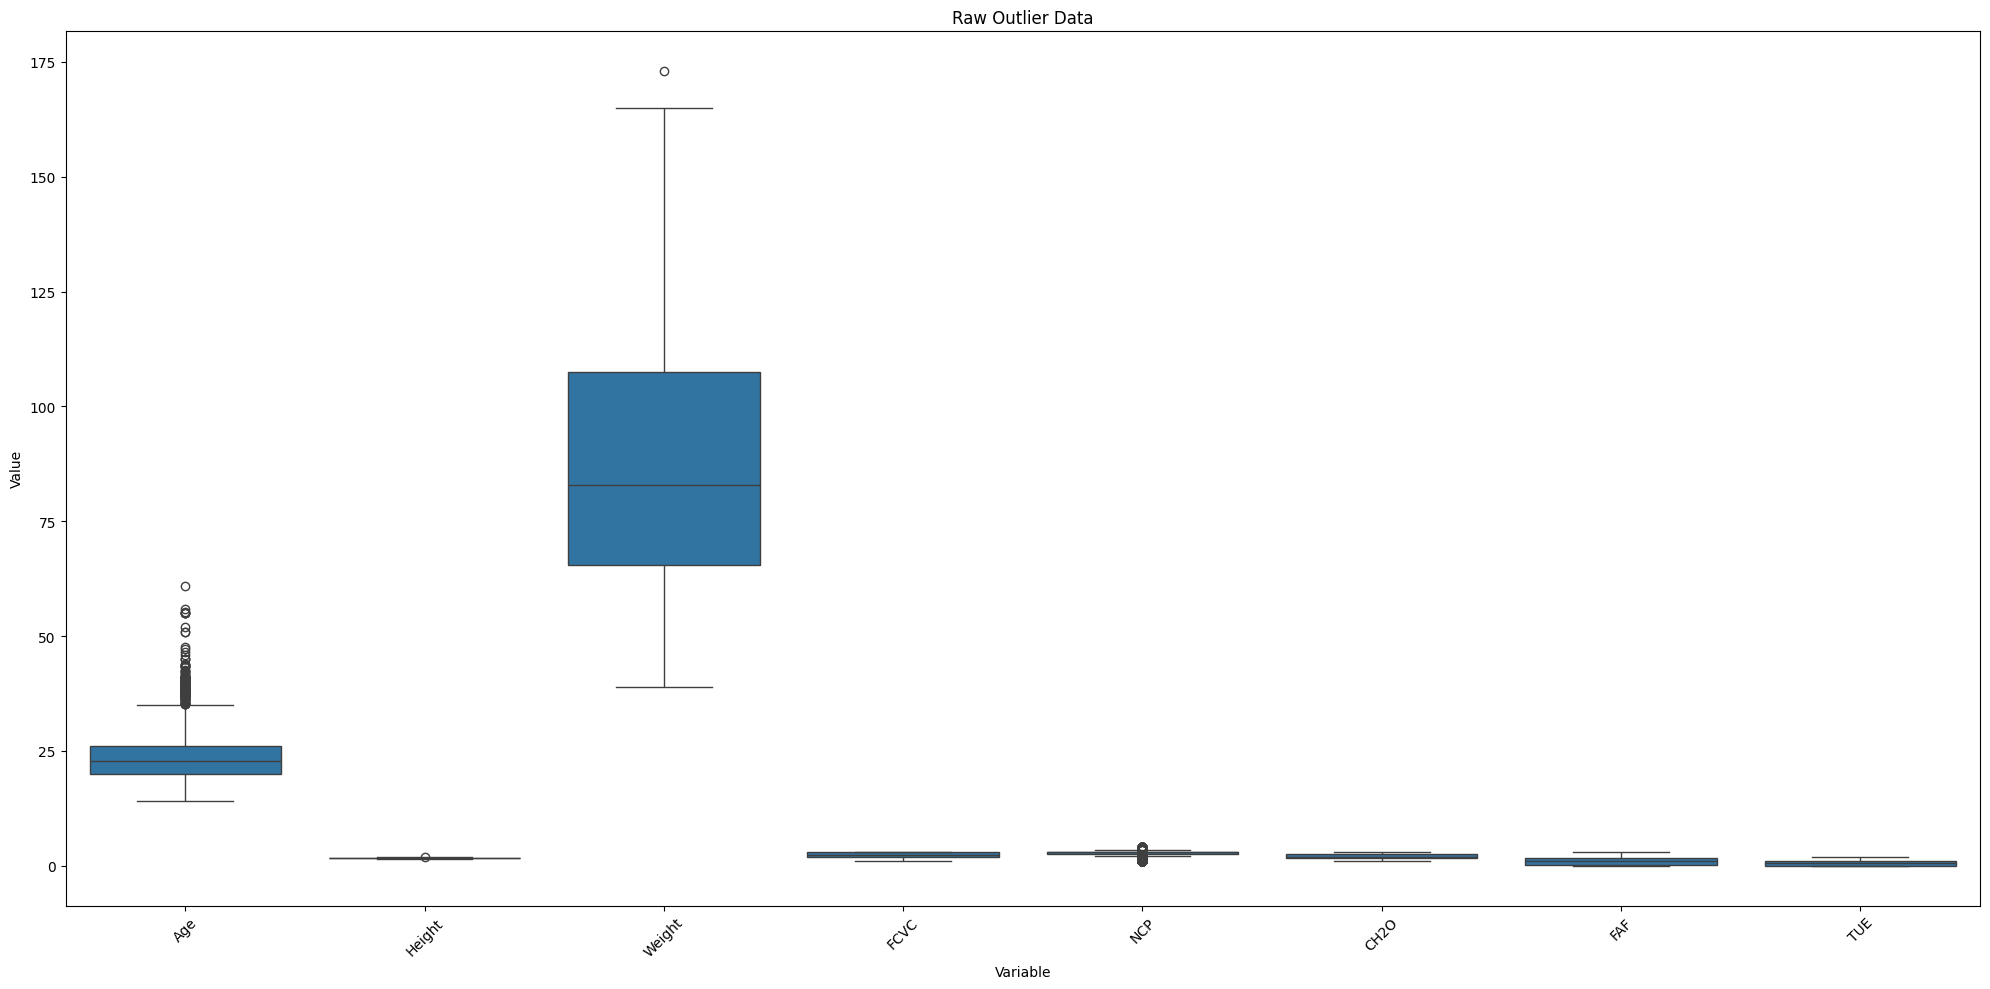

Total Rows: 2111
Total Columns: 17


In [99]:
numeric_df = dataset.select_dtypes(include='number')
melted_df = numeric_df.melt(var_name='Variable', value_name='Value')

plt.figure(figsize=(20, 10))
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.xticks(rotation=45)
plt.title("Raw Outlier Data")
plt.tight_layout()
plt.show()
print(f"Total Rows: {dataset.shape[0]}")
print(f'Total Columns: {dataset.shape[-1]}')

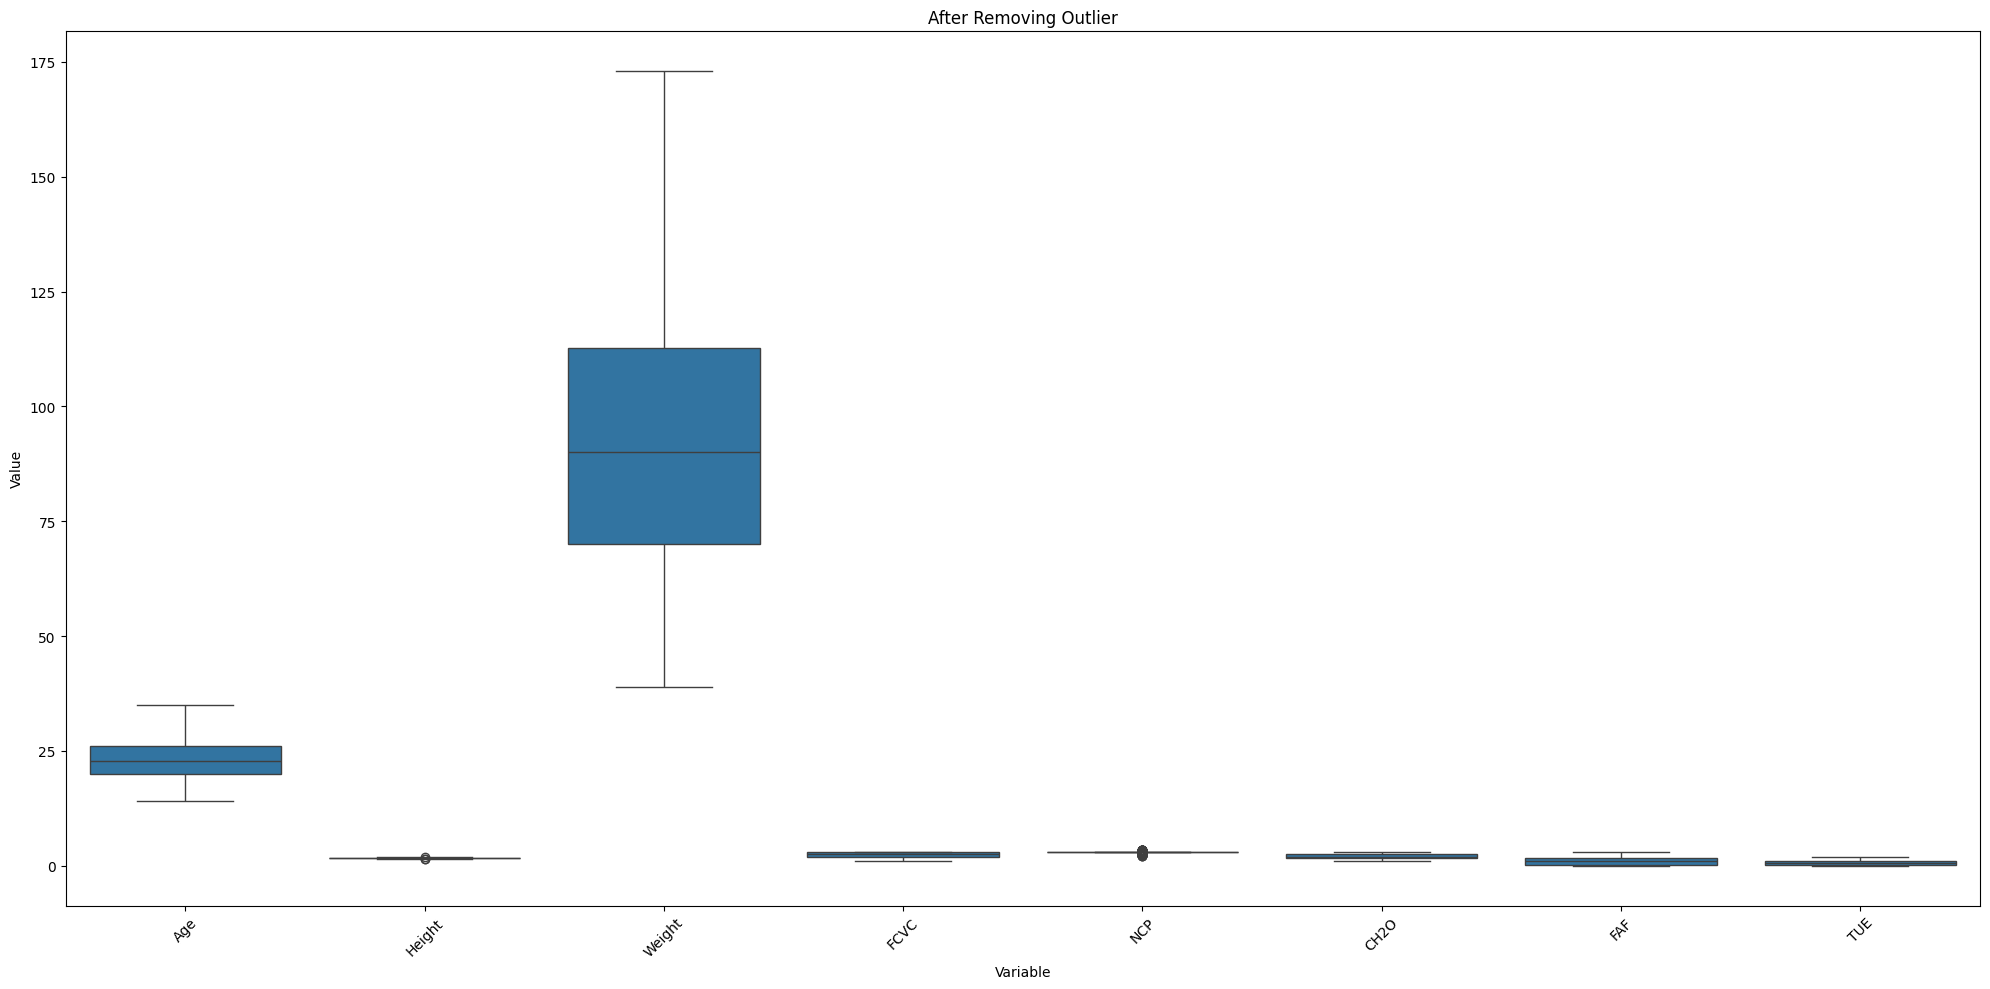

Total Rows: 1398
Total Columns: 17


In [100]:
outlierColumn = []
for i in dataset.select_dtypes(include="number").columns:
    outlierColumn.append(i)
for i in outlierColumn:
    q1 = dataset[i].quantile(0.25)
    q3 = dataset[i].quantile(0.75)
    IQR = q3-q1
    minRange = q1-(1.5*IQR)
    maxRange = q3+(1.5*IQR)
    dataset = dataset[dataset[i]<=maxRange]
    dataset = dataset[dataset[i]>=minRange]
numeric_df = dataset.select_dtypes(include='number')
melted_df = numeric_df.melt(var_name='Variable', value_name='Value')
plt.figure(figsize=(20, 10))
sns.boxplot(x='Variable', y='Value', data=melted_df)
plt.xticks(rotation=45)
plt.title("After Removing Outlier")
plt.tight_layout()
plt.show()
print(f"Total Rows: {dataset.shape[0]}")
print(f'Total Columns: {dataset.shape[-1]}')

# **All Unique Columns' Data**

In [101]:
categorical_column = ["Gender","CALC","FAVC",
                      "SCC","SMOKE","family_history_with_overweight",
                      "CAEC","MTRANS","NObeyesdad"]
UNIQUE = {}
for i in categorical_column:
    temp = dataset[i].unique()
    UNIQUE[i] = temp
for i in UNIQUE:
    print(f"{i}:\n   {UNIQUE[i]}")

Gender:
   ['Female' 'Male']
CALC:
   ['no' 'Sometimes' 'Frequently']
FAVC:
   ['no' 'yes']
SCC:
   ['no' 'yes']
SMOKE:
   ['no' 'yes']
family_history_with_overweight:
   ['yes' 'no']
CAEC:
   ['Sometimes' 'Frequently' 'Always' 'no']
MTRANS:
   ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad:
   ['Normal_Weight' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_II' 'Obesity_Type_II' 'Insufficient_Weight'
 'Obesity_Type_III']


In [102]:
dataset.to_csv("cleanData.csv", index=False)

# **Applying OneHot Encoding**

In [103]:
encoder = OneHotEncoder(sparse_output=False)

Gender_encoded = encoder.fit_transform(dataset[['Gender']])
Gender_encoded_df = pd.DataFrame(Gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
Gender_encoded_df.index = dataset.index
dataset = dataset.drop('Gender', axis=1)
dataset = pd.concat([Gender_encoded_df, dataset], axis=1)
dataset = dataset.drop('Gender_Male', axis=1)

FAVC_encoded = encoder.fit_transform(dataset[['FAVC']])
FAVC_encoded_df = pd.DataFrame(FAVC_encoded, columns=encoder.get_feature_names_out(['FAVC']))
FAVC_encoded_df.index = dataset.index
dataset = dataset.drop('FAVC', axis=1)
dataset = pd.concat([FAVC_encoded_df, dataset], axis=1)
dataset = dataset.drop('FAVC_no', axis=1)

SCC_encoded = encoder.fit_transform(dataset[['SCC']])
SCC_encoded_df = pd.DataFrame(SCC_encoded, columns=encoder.get_feature_names_out(['SCC']))
SCC_encoded_df.index = dataset.index
dataset = dataset.drop('SCC', axis=1)
dataset = pd.concat([SCC_encoded_df, dataset], axis=1)
dataset = dataset.drop('SCC_no', axis=1)

SMOKE_encoded = encoder.fit_transform(dataset[['SMOKE']])
SMOKE_encoded_df = pd.DataFrame(SMOKE_encoded, columns=encoder.get_feature_names_out(['SMOKE']))
SMOKE_encoded_df.index = dataset.index
dataset = dataset.drop('SMOKE', axis=1)
dataset = pd.concat([SMOKE_encoded_df, dataset], axis=1)
dataset = dataset.drop('SMOKE_no', axis=1)

family_history_with_overweight_encoded = encoder.fit_transform(dataset[['family_history_with_overweight']])
family_history_with_overweight_encoded_df = pd.DataFrame(family_history_with_overweight_encoded, columns=encoder.get_feature_names_out(['family_history_with_overweight']))
family_history_with_overweight_encoded_df.index = dataset.index
dataset = dataset.drop('family_history_with_overweight', axis=1)
dataset = pd.concat([family_history_with_overweight_encoded_df, dataset], axis=1)
dataset = dataset.drop('family_history_with_overweight_no', axis=1)

# **Applying Ordinal Encoding**

In [104]:
calcDATA = [['no', 'Sometimes', 'Frequently', 'Always']]
ordinalencoder = OrdinalEncoder(categories=calcDATA)
result = ordinalencoder.fit_transform(dataset[["CALC"]])
dataset = dataset.drop('CALC', axis=1)
dataset.insert(loc=8, column="CALC", value=result)


caecDATA = [['no', 'Sometimes', 'Frequently', 'Always']]
ordinalencoder = OrdinalEncoder(categories=caecDATA)
result = ordinalencoder.fit_transform(dataset[["CAEC"]])
dataset = dataset.drop('CAEC', axis=1)
dataset.insert(loc=8, column="CAEC", value=result)


mtransDATA = [['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']]
ordinalencoder = OrdinalEncoder(categories=mtransDATA)
result = ordinalencoder.fit_transform(dataset[["MTRANS"]])
dataset = dataset.drop('MTRANS', axis=1)
dataset.insert(loc=8, column="MTRANS", value=result)


nobeyesdadDATA = [['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']]
ordinalencoder = OrdinalEncoder(categories=nobeyesdadDATA)
result = ordinalencoder.fit_transform(dataset[["NObeyesdad"]])
dataset = dataset.drop('NObeyesdad', axis=1)
dataset.insert(loc=16, column="NObeyesdad", value=result)

In [105]:
dataset.head(10)

,family_history_with_overweight_yes,SMOKE_yes,SCC_yes,FAVC_yes,Gender_Female,Age,Height,Weight,MTRANS,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
0,1.0,0.0,0.0,0.0,1.0,21.0,1.62,64.0,0.0,1.0,0.0,2.0,3.0,2.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,1.0,21.0,1.52,56.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,23.0,1.80,77.0,0.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,27.0,1.80,87.0,1.0,1.0,2.0,3.0,3.0,2.0,2.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,29.0,1.62,53.0,2.0,1.0,1.0,2.0,3.0,2.0,0.0,0.0,0.0
6,1.0,0.0,0.0,1.0,1.0,23.0,1.50,55.0,3.0,1.0,1.0,3.0,3.0,2.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,22.0,1.64,53.0,0.0,1.0,1.0,2.0,3.0,2.0,3.0,0.0,0.0
8,1.0,0.0,0.0,1.0,0.0,24.0,1.78,64.0,0.0,1.0,2.0,3.0,3.0,2.0,1.0,1.0,0.0
9,1.0,0.0,0.0,1.0,0.0,22.0,1.72,68.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,0.0
10,1.0,0.0,0.0,1.0,0.0,26.0,1.85,105.0,0.0,2.0,1.0,3.0,3.0,3.0,2.0,2.0,3.0


# **Find The Total Number of Duplicated Rows and Columns**

In [106]:
print(f"Duplicated Rows: {dataset.duplicated().sum()}")
print(f'Duplicated Columns: {dataset.T.duplicated().sum()}')
print(f"Total Rows: {dataset.shape[0]}")
print(f'Total Columns: {dataset.shape[-1]}')

Duplicated Rows: 4
Duplicated Columns: 0
Total Rows: 1398
Total Columns: 17


# **All the Duplicate Columns**

In [107]:
dataset[dataset.duplicated(keep=False)]

,family_history_with_overweight_yes,SMOKE_yes,SCC_yes,FAVC_yes,Gender_Female,Age,Height,Weight,MTRANS,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
208,1.0,0.0,0.0,1.0,1.0,22.0,1.69,65.0,0.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
209,1.0,0.0,0.0,1.0,1.0,22.0,1.69,65.0,0.0,1.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
282,1.0,0.0,0.0,1.0,1.0,18.0,1.62,55.0,0.0,2.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0
443,1.0,0.0,0.0,1.0,0.0,18.0,1.72,53.0,0.0,1.0,1.0,2.0,3.0,2.0,0.0,2.0,4.0
460,1.0,0.0,0.0,1.0,1.0,18.0,1.62,55.0,0.0,2.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0
466,1.0,0.0,0.0,1.0,0.0,22.0,1.74,75.0,2.0,2.0,0.0,3.0,3.0,1.0,1.0,0.0,0.0
467,1.0,0.0,0.0,1.0,0.0,22.0,1.74,75.0,2.0,2.0,0.0,3.0,3.0,1.0,1.0,0.0,0.0
496,1.0,0.0,0.0,1.0,0.0,18.0,1.72,53.0,0.0,1.0,1.0,2.0,3.0,2.0,0.0,2.0,4.0


# **Remove Duplicate Rows**

In [108]:
dataset = dataset.drop_duplicates()
dataset.to_csv('dataset.csv', index=False)
print(f"Total Rows: {dataset.shape[0]}")
print(f'Total Columns: {dataset.shape[-1]}')

Total Rows: 1394
Total Columns: 17


# **Correlation Matrix**

In [109]:
dataset.corr()

,family_history_with_overweight_yes,SMOKE_yes,SCC_yes,FAVC_yes,Gender_Female,Age,Height,Weight,MTRANS,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
family_history_with_overweight_yes,1.000000,0.005181,-0.271021,0.247972,-0.081159,0.238124,0.231034,0.500941,-0.031123,-0.155489,0.012293,0.052176,-0.052668,0.194172,-0.131693,0.023351,0.322903
SMOKE_yes,0.005181,1.000000,0.037741,-0.027160,-0.069593,0.128869,0.098275,0.043892,0.031021,0.026728,0.105148,0.005205,0.030630,-0.083140,0.020563,0.033384,-0.009974
SCC_yes,-0.271021,0.037741,1.000000,-0.258196,0.113083,-0.119784,-0.177147,-0.240160,0.023361,0.137182,0.012312,0.079212,-0.058990,-0.011704,0.086803,-0.071668,-0.177801
FAVC_yes,0.247972,-0.027160,-0.258196,1.000000,-0.027963,0.113107,0.186798,0.310725,-0.053550,-0.109900,0.121726,0.009690,-0.004039,-0.017881,-0.166947,0.041103,0.255338
Gender_Female,-0.081159,-0.069593,0.113083,-0.027963,1.000000,-0.167642,-0.605239,-0.035221,-0.228962,0.049481,0.052095,0.386731,0.135314,-0.076597,-0.158738,-0.018330,0.257151
Age,0.238124,0.128869,-0.119784,0.113107,-0.167642,1.000000,0.133900,0.303602,0.415356,-0.127955,0.105028,0.058826,-0.083457,0.039740,-0.202543,-0.188620,0.218582
Height,0.231034,0.098275,-0.177147,0.186798,-0.605239,0.133900,1.000000,0.442738,0.114843,-0.067416,0.129163,-0.090355,-0.033544,0.191211,0.237524,0.015441,0.124349
Weight,0.500941,0.043892,-0.240160,0.310725,-0.035221,0.303602,0.442738,1.000000,-0.081096,-0.316118,0.241068,0.280890,-0.052635,0.238085,-0.086270,-0.127825,0.707288
MTRANS,-0.031123,0.031021,0.023361,-0.053550,-0.228962,0.415356,0.114843,-0.081096,1.000000,0.010034,-0.029693,-0.096565,0.013167,-0.027488,0.052358,-0.032633,-0.196874
CAEC,-0.155489,0.026728,0.137182,-0.109900,0.049481,-0.127955,-0.067416,-0.316118,0.010034,1.000000,-0.071376,-0.020406,0.062367,-0.101556,0.062157,0.061558,-0.229673


# **Visual Representation of Correlation via HeatMap**
# **Full Dataset**

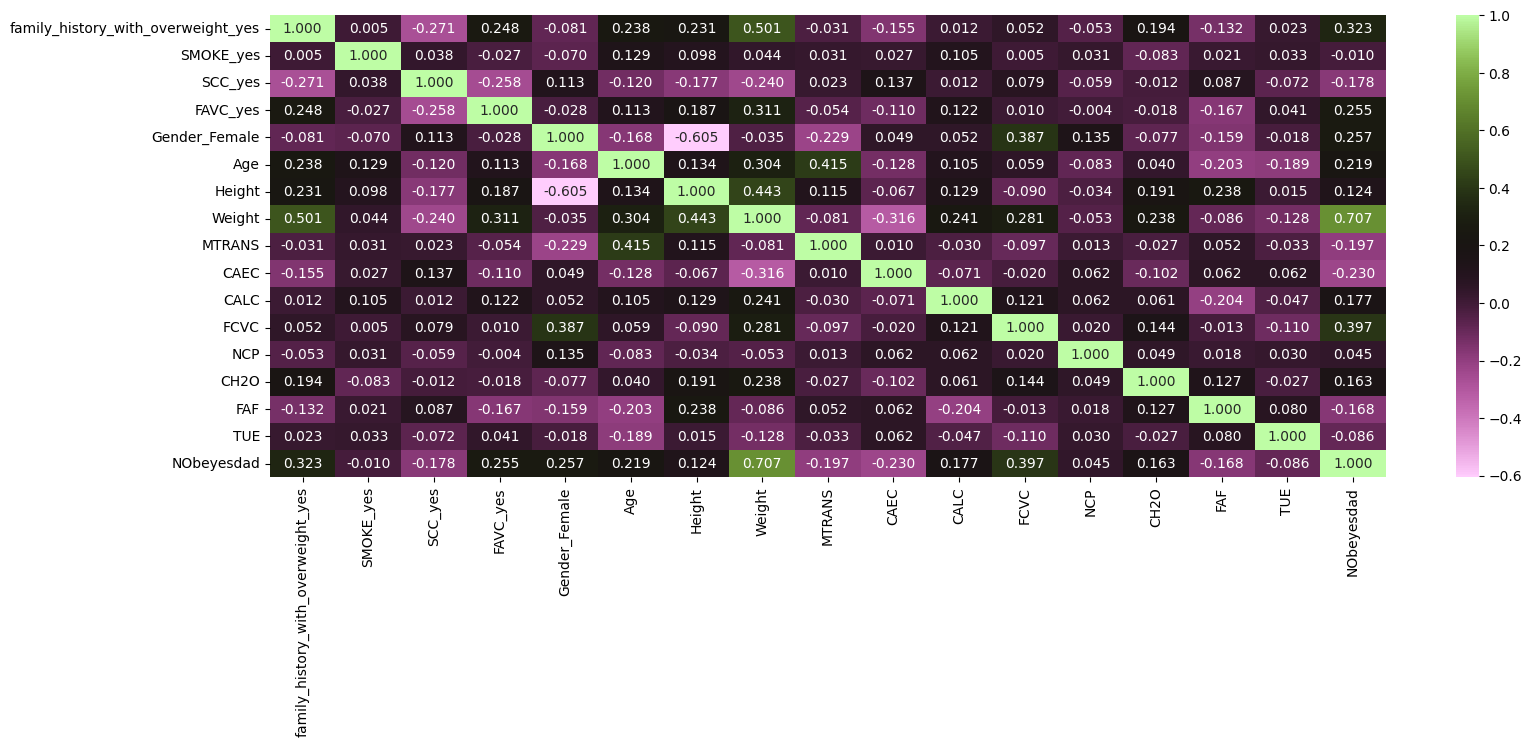

In [110]:
CM = dataset.corr()
plt.figure(figsize=(18, 6))
sns.heatmap(CM, annot=True, cmap='vanimo', fmt='.3f', linewidths=0.)
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# **Train Test Split with Train set (70%) | Test set (30%)**

In [111]:
input = dataset.drop("NObeyesdad", axis=1)
output = dataset["NObeyesdad"]
X_train, X_test, y_train, y_test  = train_test_split(input, output, test_size=0.3, random_state=42)

# **Data Shape**

In [112]:
X_train.shape, X_test.shape

((975, 16), (419, 16))

# **X_train**

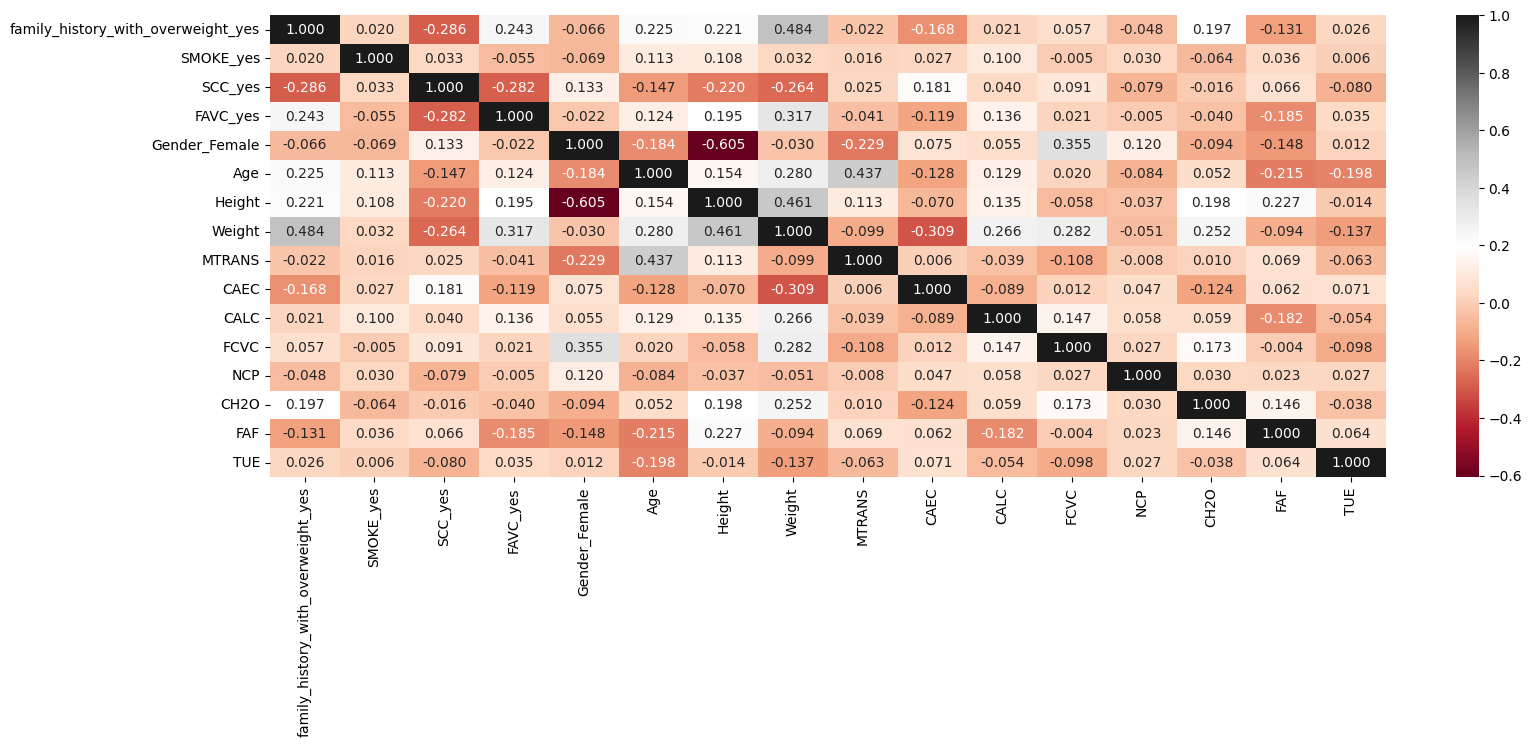

In [113]:
CMtrx = X_train.corr()
plt.figure(figsize=(18, 6))
sns.heatmap(CMtrx, annot=True, cmap='RdGy', fmt='.3f', linewidths=0.)
plt.show()

# **Feature Selection**

# **Correlation and Drop Columns**

In [114]:
corr_Matrix = X_train.corr()
columns = corr_Matrix.columns
columns_to_Drop = []
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        if corr_Matrix.loc[columns[i], columns[j]] > 0.85:
            columns_to_Drop.append(columns[j])
print(len(columns_to_Drop))

0


# **Varience Threshold**

In [115]:
VT = VarianceThreshold(threshold=0.05)
VT.fit(X_train)

VarianceThreshold(threshold=0.05)

In [116]:
print(sum(VT.get_support()))

12


In [117]:
columns = X_train.columns[VT.get_support()]
X_train = VT.transform(X_train)
X_test = VT.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

# **Shape of Training and Test Data**

In [118]:
X_train.shape, X_test.shape

((975, 12), (419, 12))

# **X_train DataFrame**

In [119]:
X_train.head(100)

,family_history_with_overweight_yes,FAVC_yes,Gender_Female,Age,Weight,MTRANS,CAEC,CALC,FCVC,CH2O,FAF,TUE
0,1.0,1.0,1.0,21.009596,131.866734,0.0,1.0,1.0,3.000000,1.709556,1.592494,0.925843
1,1.0,1.0,0.0,18.048920,99.430612,0.0,1.0,0.0,2.000000,2.000000,1.579431,0.839862
2,0.0,1.0,0.0,19.000000,60.000000,0.0,3.0,1.0,2.000000,1.000000,1.000000,1.000000
3,1.0,0.0,0.0,19.000000,65.000000,0.0,2.0,0.0,2.000000,2.000000,1.000000,0.000000
4,1.0,1.0,1.0,26.000000,111.555967,0.0,1.0,1.0,3.000000,2.634342,0.000000,0.178301
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,0.0,20.418832,105.257543,0.0,1.0,0.0,2.000000,2.793505,2.219390,0.202902
96,1.0,1.0,1.0,17.451085,65.000000,0.0,1.0,1.0,3.000000,2.000000,0.479592,1.720642
97,1.0,1.0,1.0,26.000000,104.826776,0.0,1.0,1.0,3.000000,2.654702,0.000000,0.555468
98,1.0,1.0,1.0,23.000000,55.000000,3.0,1.0,1.0,3.000000,2.000000,1.000000,0.000000


In [140]:
X_test.head(100)

,family_history_with_overweight_yes,FAVC_yes,Gender_Female,Age,Weight,MTRANS,CAEC,CALC,FCVC,CH2O,FAF,TUE
0,1.0,1.0,1.0,21.849705,133.963349,0.0,1.0,1.0,3.000000,2.825629,1.399183,0.928972
1,1.0,1.0,1.0,25.991886,102.003378,0.0,1.0,1.0,3.000000,1.003563,0.008127,1.000000
2,1.0,1.0,0.0,24.178638,121.684311,0.0,1.0,1.0,2.954417,2.104696,0.870056,0.000000
3,1.0,1.0,1.0,21.571288,68.058902,0.0,1.0,1.0,1.766849,2.616285,0.943058,0.256977
4,1.0,0.0,1.0,19.821996,75.090439,0.0,1.0,1.0,2.766036,2.707927,0.702839,0.827439
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,1.0,20.978166,132.054793,0.0,1.0,1.0,3.000000,1.678791,1.682490,0.818871
96,0.0,1.0,1.0,19.000000,50.000000,0.0,2.0,1.0,2.000000,1.000000,0.000000,2.000000
97,1.0,1.0,0.0,33.749594,107.025415,2.0,1.0,0.0,2.561638,1.000000,1.980401,0.000000
98,1.0,1.0,0.0,31.333798,91.059595,0.0,1.0,1.0,2.000000,1.184230,0.155579,0.453404


In [120]:
categorical_data = ["Gender","CALC","FAVC",
                      "SCC","SMOKE","family_history_with_overweight",
                      "CAEC","MTRANS","NObeyesdad"]
print(len(categorical_data))

9


# **Standardization**

In [121]:
to_scale = ['Age', 'Weight']


scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test_scaled[to_scale] = scaler.transform(X_test[to_scale])

In [122]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# **MODELS**

# **Decision Tree**

In [123]:
DT = DecisionTreeClassifier(random_state=20)
DT.fit(X_train_resampled, y_train_resampled)  # Use resampled balanced data
y_pred_dt = DT.predict(X_test_scaled)         # Predict on scaled test set

accuracyDT = accuracy_score(y_test, y_pred_dt) * 100
precisionDT = precision_score(y_test, y_pred_dt, average='weighted') * 100
recallDT = recall_score(y_test, y_pred_dt, average='weighted') * 100
f1DT = f1_score(y_test, y_pred_dt, average='weighted') * 100

print(f"Accuracy Score: {accuracyDT:.4f}")
print(f"Precision Score: {precisionDT:.4f}")
print(f"Recall Score: {recallDT:.4f}")
print(f"F1 Score: {f1DT:.4f}")

correct = np.sum(np.array(y_test) == np.array(y_pred_dt))
total = len(y_test)
wrong = total - correct

print(f"Correct Predictions: {correct}")
print(f"Wrong Predictions: {wrong}")


Accuracy Score: 84.2482
Precision Score: 84.1206
Recall Score: 84.2482
F1 Score: 84.0772
Correct Predictions: 353
Wrong Predictions: 66


# **Random Forest Classifier with Scaled Data**

In [124]:
rf_model = RandomForestClassifier(random_state=19)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test_scaled)

y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)

accuracyRF = accuracy_score(y_test, y_pred) * 100
PrecisionRF = precision_score(y_test, y_pred_rf, average="macro")*100
RecallRF = recall_score(y_test, y_pred_rf, average="macro")*100
F1RF = f1_score(y_test, y_pred_rf, average="macro")*100

print(f'Random Forest accuracy: {accuracyRF:.2f}%')
print(f'Precision Score (macro): {PrecisionRF:.2f}')
print(f'Recall Score (macro): {RecallRF:.2f}')
print(f'F1 Score (macro): {F1RF:.2f}')


correct = np.sum(np.array(y_test) == np.array(y_pred_rf))
total = len(y_test)
wrong = total - correct

print(f"Correct Predictions: {correct}")
print(f"Wrong Predictions: {wrong}")

Random Forest accuracy: 90.21%
Precision Score (macro): 88.15
Recall Score (macro): 87.89
F1 Score (macro): 87.91
Correct Predictions: 378
Wrong Predictions: 41


In [125]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')
from google.colab import files
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)

X_accuracyRF = accuracy_score(y_test, y_pred) * 100
X_PrecisionRF = precision_score(y_test, y_pred_rf, average="macro")*100
X_RecallRF = recall_score(y_test, y_pred_rf, average="macro")*100
X_F1RF = f1_score(y_test, y_pred_rf, average="macro")*100

print(f'Random Forest accuracy: {X_accuracyRF:.2f}%')
print(f'Precision Score (macro): {X_PrecisionRF:.2f}')
print(f'Recall Score (macro): {X_RecallRF:.2f}')
print(f'F1 Score (macro): {X_F1RF:.2f}')

correct = np.sum(np.array(y_test) == np.array(y_pred_rf))
total = len(y_test)
wrong = total - correct

print(f"Correct Predictions: {correct}")
print(f"Wrong Predictions: {wrong}")

Random Forest accuracy: 41.05%
Precision Score (macro): 29.02
Recall Score (macro): 30.05
F1 Score (macro): 20.84
Correct Predictions: 172
Wrong Predictions: 247


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Logistic Regression with Scaled Data**

In [127]:
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

accuracyLGR = accuracy_score(y_test, y_pred_log) * 100
PrecisionLGR = precision_score(y_test, y_pred_log, average="macro")* 100
RecallLGR = recall_score(y_test, y_pred_log, average="macro")* 100
F1LGR = f1_score(y_test, y_pred_log, average="macro")* 100

print(f'Accuracy (Logistic Regression): {accuracyLGR}%')
print(f'Precision Score (macro): {PrecisionLGR:.2f}')
print(f'Recall Score (macro): {RecallLGR:.2f}')
print(f'F1 Score (macro): {F1LGR:.2f}')

correct = np.sum(np.array(y_test) == np.array(y_pred_log))
total = len(y_test)
wrong = total - correct

print(f"Correct Predictions: {correct}")
print(f"Wrong Predictions: {wrong}")

Accuracy (Logistic Regression): 81.86157517899761%
Precision Score (macro): 80.44
Recall Score (macro): 79.30
F1 Score (macro): 78.02
Correct Predictions: 343
Wrong Predictions: 76


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_resampled, y_train_resampled)

y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

X_accuracyLGR = accuracy_score(y_test, y_pred_log) * 100
X_PrecisionLGR = precision_score(y_test, y_pred_log, average="macro")* 100
X_RecallLGR = recall_score(y_test, y_pred_log, average="macro")* 100
X_F1LGR = f1_score(y_test, y_pred_log, average="macro")* 100

print(f'Accuracy (Logistic Regression): {X_accuracyLGR}%')
print(f'Precision Score (macro): {X_PrecisionLGR:.2f}')
print(f'Recall Score (macro): {X_RecallLGR:.2f}')
print(f'F1 Score (macro): {X_F1LGR:.2f}')

correct = np.sum(np.array(y_test) == np.array(y_pred_log))
total = len(y_test)
wrong = total - correct

print(f"Correct Predictions: {correct}")
print(f"Wrong Predictions: {wrong}")

Accuracy (Logistic Regression): 16.467780429594274%
Precision Score (macro): 2.35
Recall Score (macro): 14.29
F1 Score (macro): 4.04
Correct Predictions: 69
Wrong Predictions: 350


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Neural Network with Scaled Data**

In [129]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=800, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

y_pred = mlp.predict(X_test_scaled)

accuracyNN = accuracy_score(y_test, y_pred) * 100
precisionNN = precision_score(y_test, y_pred, average='weighted') * 100
recallNN = recall_score(y_test, y_pred, average='weighted') * 100
f1NN = f1_score(y_test, y_pred, average='weighted') * 100

print(f"Accuracy: {accuracyNN:.2f}%")
print(f"Precision: {precisionNN:.2f}%")
print(f"Recall: {recallNN:.2f}%")
print(f"F1 Score: {f1NN:.2f}%")

correct = np.sum(np.array(y_test) == np.array(y_pred))
total = len(y_test)
wrong = total - correct

print(f"Correct Predictions: {correct}")
print(f"Wrong Predictions: {wrong}")

Accuracy: 89.50%
Precision: 89.71%
Recall: 89.50%
F1 Score: 89.43%
Correct Predictions: 375
Wrong Predictions: 44


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


In [130]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=800, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

y_pred = mlp.predict(X_test)

X_accuracyNN = accuracy_score(y_test, y_pred) * 100
X_precisionNN = precision_score(y_test, y_pred, average='weighted') * 100
X_recallNN = recall_score(y_test, y_pred, average='weighted') * 100
X_f1NN = f1_score(y_test, y_pred, average='weighted') * 100

print(f"Accuracy: {X_accuracyNN:.2f}%")
print(f"Precision: {X_precisionNN:.2f}%")
print(f"Recall: {X_recallNN:.2f}%")
print(f"F1 Score: {X_f1NN:.2f}%")


correct = np.sum(np.array(y_test) == np.array(y_pred))
total = len(y_test)
wrong = total - correct

print(f"Correct Predictions: {correct}")
print(f"Wrong Predictions: {wrong}")

Accuracy: 16.47%
Precision: 2.71%
Recall: 16.47%
F1 Score: 4.66%
Correct Predictions: 69
Wrong Predictions: 350


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **DASHBOARD**

# **Comparison among Accuracy | Precision | Recall | F1 Score**

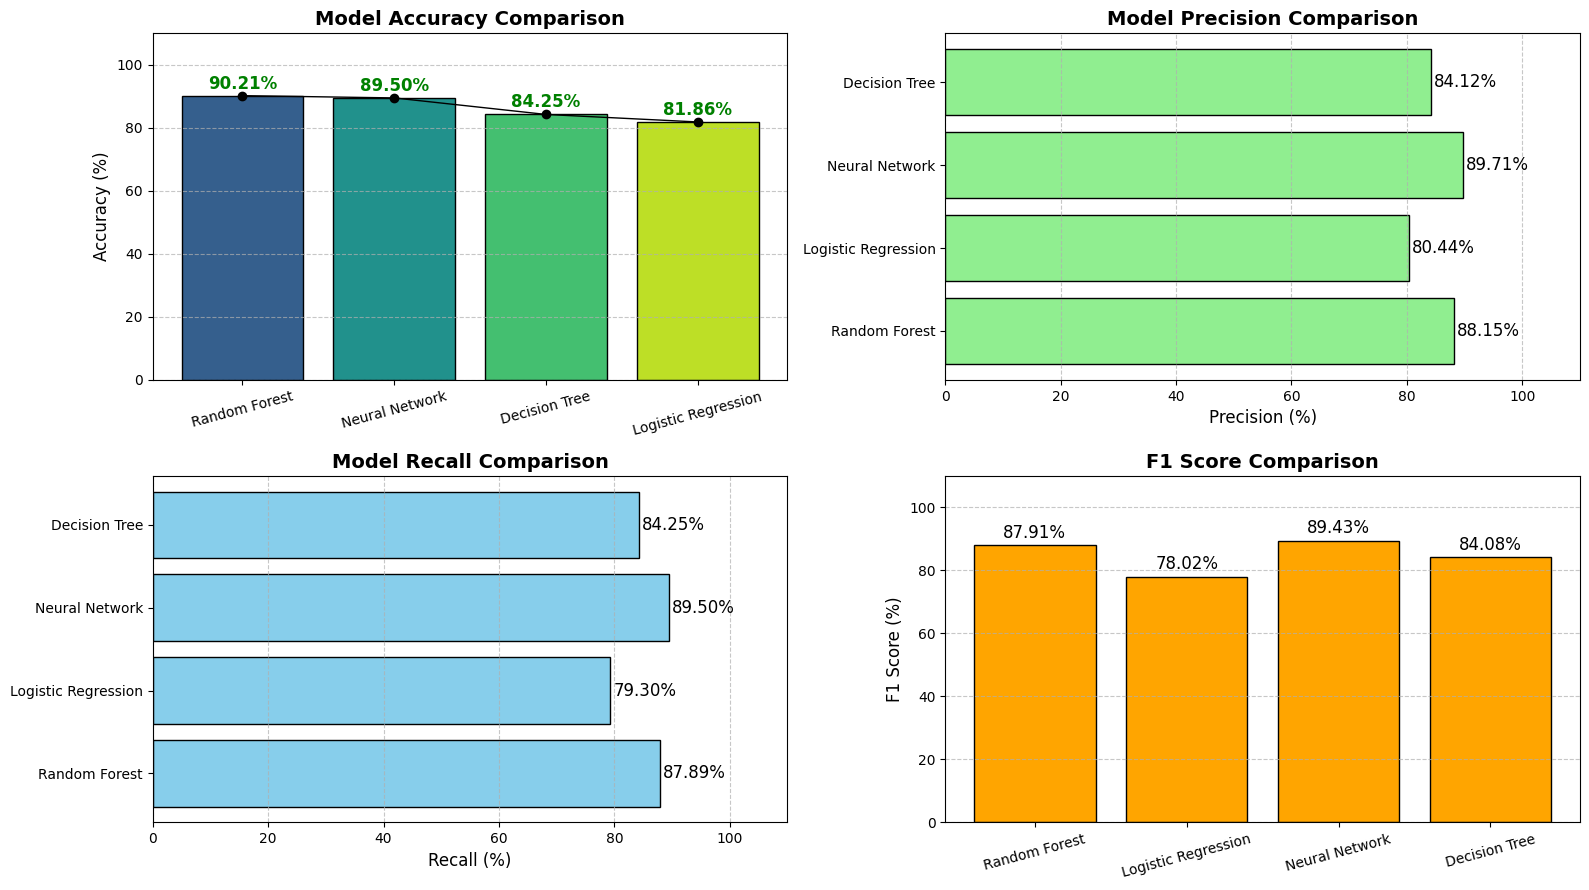

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Define your metrics
models_all = [ 'Random Forest', 'Logistic Regression', 'Neural Network', 'Decision Tree']
accuracies = [accuracyRF, accuracyLGR, accuracyNN, accuracyDT]

models_precision = [ 'Random Forest', 'Logistic Regression', 'Neural Network', 'Decision Tree']
Precision = [PrecisionRF, PrecisionLGR, precisionNN, precisionDT]

models_recall = [ 'Random Forest', 'Logistic Regression', 'Neural Network', 'Decision Tree']
recall = [RecallRF, RecallLGR, recallNN, recallDT]

models_f1 = [ 'Random Forest', 'Logistic Regression', 'Neural Network', 'Decision Tree']
f1_scores = [F1RF, F1LGR, f1NN, f1DT]

# Sort by accuracy
sorted_indices = np.argsort(accuracies)[::-1]
models_sorted = [models_all[i] for i in sorted_indices]
accuracies_sorted = [accuracies[i] for i in sorted_indices]
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(accuracies_sorted)))

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 9))
ax1, ax2, ax3, ax4 = axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]

# Accuracy Plot
bars1 = ax1.bar(models_sorted, accuracies_sorted, color=colors, edgecolor='black')
ax1.plot(models_sorted, accuracies_sorted, marker='o', linestyle='-', color='black', linewidth=1)
for bar, acc in zip(bars1, accuracies_sorted):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{acc:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='green')
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.set_ylim(0, 110)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=15)

# Precision Plot
bars2 = ax2.barh(models_precision, Precision, color='lightgreen', edgecolor='black')
for bar, prec in zip(bars2, Precision):
    ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{prec:.2f}%', va='center', fontsize=12)
ax2.set_title('Model Precision Comparison', fontsize=14, fontweight='bold')
ax2.set_xlabel('Precision (%)', fontsize=12)
ax2.set_xlim(0, 110)
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Recall Plot
bars3 = ax3.barh(models_recall, recall, color='skyblue', edgecolor='black')
for bar, rec in zip(bars3, recall):
    ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{rec:.2f}%', va='center', fontsize=12)
ax3.set_title('Model Recall Comparison', fontsize=14, fontweight='bold')
ax3.set_xlabel('Recall (%)', fontsize=12)
ax3.set_xlim(0, 110)
ax3.grid(axis='x', linestyle='--', alpha=0.7)

# F1 Score Plot
bars4 = ax4.bar(models_f1, f1_scores, color='orange', edgecolor='black')
for bar, score in zip(bars4, f1_scores):
    yval = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{score:.2f}%',
             ha='center', va='bottom', fontsize=12)
ax4.set_title('F1 Score Comparison', fontsize=14, fontweight='bold')
ax4.set_ylabel('F1 Score (%)', fontsize=12)
ax4.set_ylim(0, 110)
ax4.grid(axis='y', linestyle='--', alpha=0.7)
ax4.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


# **Comparison Between Scaled and Unscaled Model**

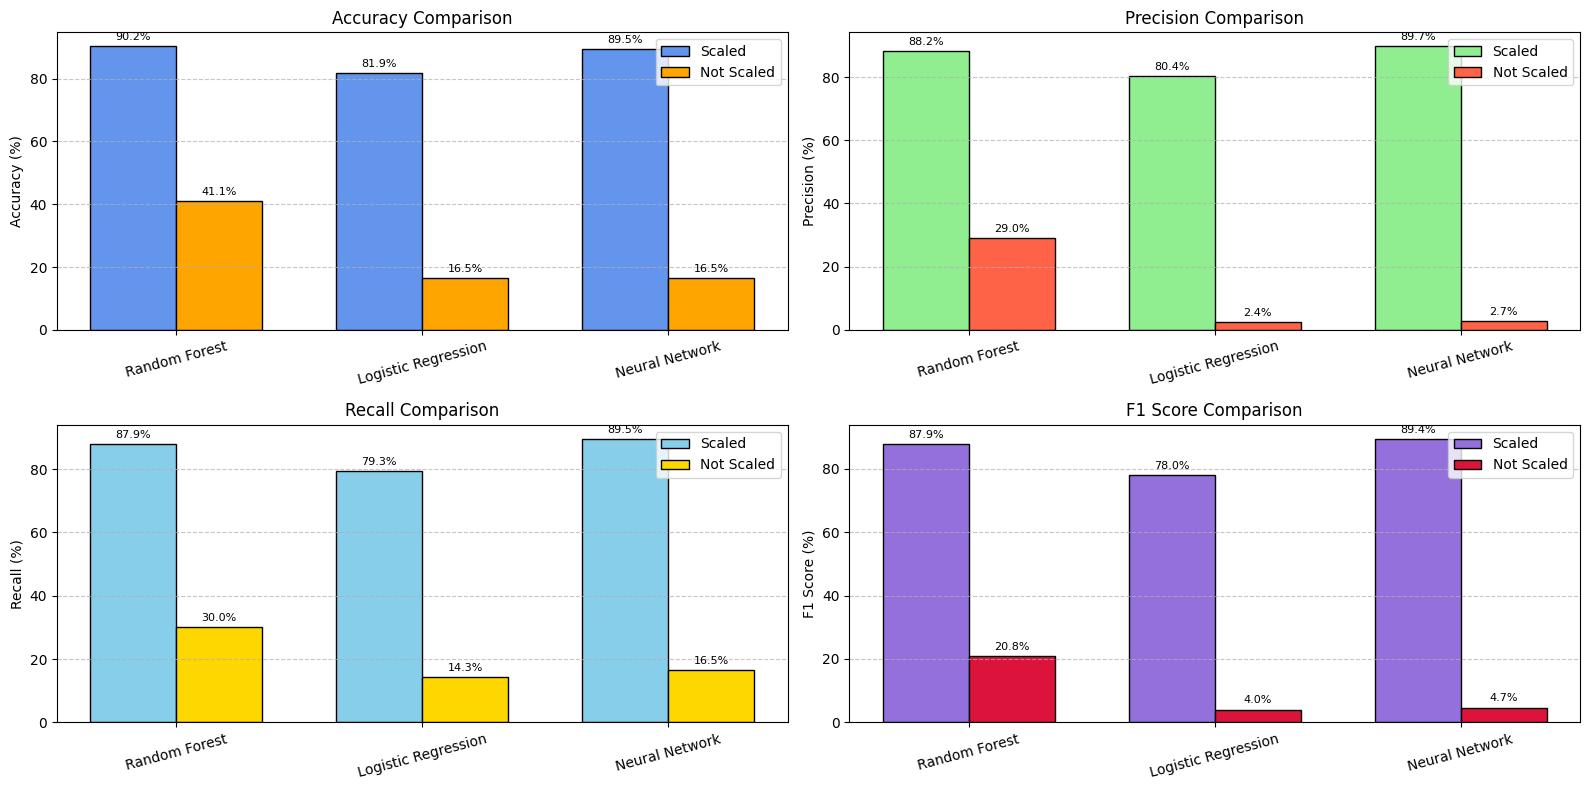

In [132]:
models = ['Random Forest', 'Logistic Regression', 'Neural Network']

acc = [accuracyRF, accuracyLGR, accuracyNN]
X_acc = [X_accuracyRF, X_accuracyLGR, X_accuracyNN]


prec = [PrecisionRF, PrecisionLGR, precisionNN]
X_prec = [X_PrecisionRF, X_PrecisionLGR, X_precisionNN]


rec = [RecallRF, RecallLGR, recallNN]
X_rec = [X_RecallRF, X_RecallLGR, X_recallNN]


f1s = [F1RF, F1LGR, f1NN]
X_f1s = [X_F1RF, X_F1LGR, X_f1NN]


x = np.arange(len(models))
width = 0.35

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

def annotate_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

bars1 = axs[0, 0].bar(x - width/2, acc, width, label='Scaled', color='cornflowerblue', edgecolor='black')
bars2 = axs[0, 0].bar(x + width/2, X_acc, width, label='Not Scaled', color='orange', edgecolor='black')
axs[0, 0].set_title('Accuracy Comparison')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(models, rotation=15)
axs[0, 0].set_ylabel('Accuracy (%)')
axs[0, 0].legend()
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
annotate_bars(axs[0, 0], bars1)
annotate_bars(axs[0, 0], bars2)

bars3 = axs[0, 1].bar(x - width/2, prec, width, label='Scaled', color='lightgreen', edgecolor='black')
bars4 = axs[0, 1].bar(x + width/2, X_prec, width, label='Not Scaled', color='tomato', edgecolor='black')
axs[0, 1].set_title('Precision Comparison')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(models, rotation=15)
axs[0, 1].set_ylabel('Precision (%)')
axs[0, 1].legend()
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
annotate_bars(axs[0, 1], bars3)
annotate_bars(axs[0, 1], bars4)

bars5 = axs[1, 0].bar(x - width/2, rec, width, label='Scaled', color='skyblue', edgecolor='black')
bars6 = axs[1, 0].bar(x + width/2, X_rec, width, label='Not Scaled', color='gold', edgecolor='black')
axs[1, 0].set_title('Recall Comparison')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(models, rotation=15)
axs[1, 0].set_ylabel('Recall (%)')
axs[1, 0].legend()
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
annotate_bars(axs[1, 0], bars5)
annotate_bars(axs[1, 0], bars6)

bars7 = axs[1, 1].bar(x - width/2, f1s, width, label='Scaled', color='mediumpurple', edgecolor='black')
bars8 = axs[1, 1].bar(x + width/2, X_f1s, width, label='Not Scaled', color='crimson', edgecolor='black')
axs[1, 1].set_title('F1 Score Comparison')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(models, rotation=15)
axs[1, 1].set_ylabel('F1 Score (%)')
axs[1, 1].legend()
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
annotate_bars(axs[1, 1], bars7)
annotate_bars(axs[1, 1], bars8)

plt.tight_layout()
plt.show()


# **Confusion Matrix Display**

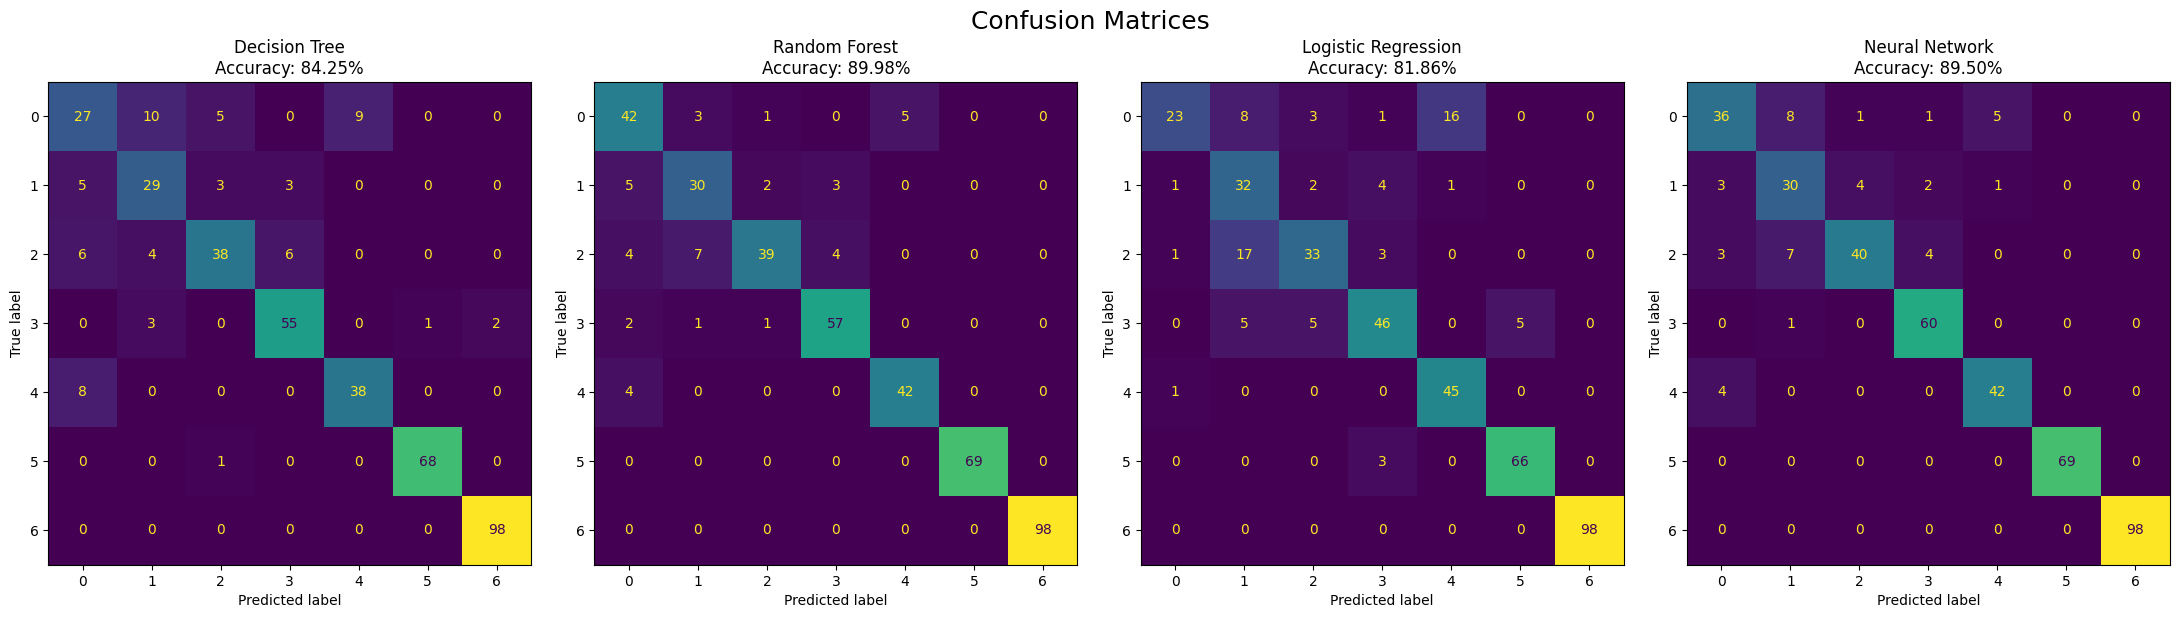

In [133]:
models = [
    ('Decision Tree', DT),
    ('Random Forest', rf_model),
    ('Logistic Regression', log_reg),
    ('Neural Network', mlp)
]

fig, axs = plt.subplots(1, len(models), figsize=(22, 6))

for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axs[i], colorbar=False)
    axs[i].set_title(f'{name}\nAccuracy: {acc:.2%}')

plt.suptitle("Confusion Matrices", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **ROC Curve**

# **Random Forest ROC Curve**

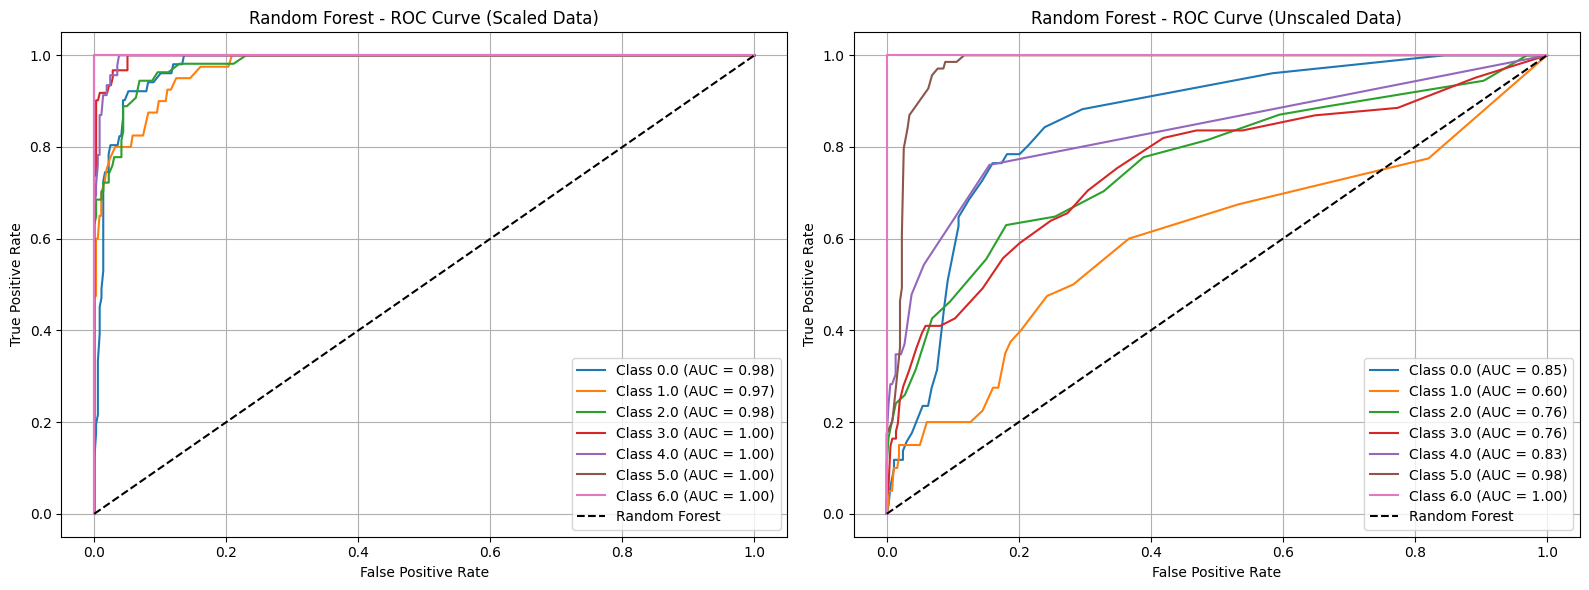

In [134]:
classes = np.unique(y_test)
n_classes = len(classes)

y_test_bin = label_binarize(y_test, classes=classes)
y_score_scaled = rf_model.predict_proba(X_test_scaled)
y_score_unscaled = rf_model.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i in range(n_classes):
    fpr_s, tpr_s, _ = roc_curve(y_test_bin[:, i], y_score_scaled[:, i])
    auc_s = auc(fpr_s, tpr_s)
    ax1.plot(fpr_s, tpr_s, label=f'Class {classes[i]} (AUC = {auc_s:.2f})')

ax1.plot([0, 1], [0, 1], 'k--', label='Random Forest')
ax1.set_title('Random Forest - ROC Curve (Scaled Data)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc='lower right')
ax1.grid(True)

for i in range(n_classes):
    fpr_u, tpr_u, _ = roc_curve(y_test_bin[:, i], y_score_unscaled[:, i])
    auc_u = auc(fpr_u, tpr_u)
    ax2.plot(fpr_u, tpr_u, label=f'Class {classes[i]} (AUC = {auc_u:.2f})')

ax2.plot([0, 1], [0, 1], 'k--', label='Random Forest')
ax2.set_title('Random Forest - ROC Curve (Unscaled Data)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.tight_layout()
plt.show()

# **Logistic Regression ROC Curve**

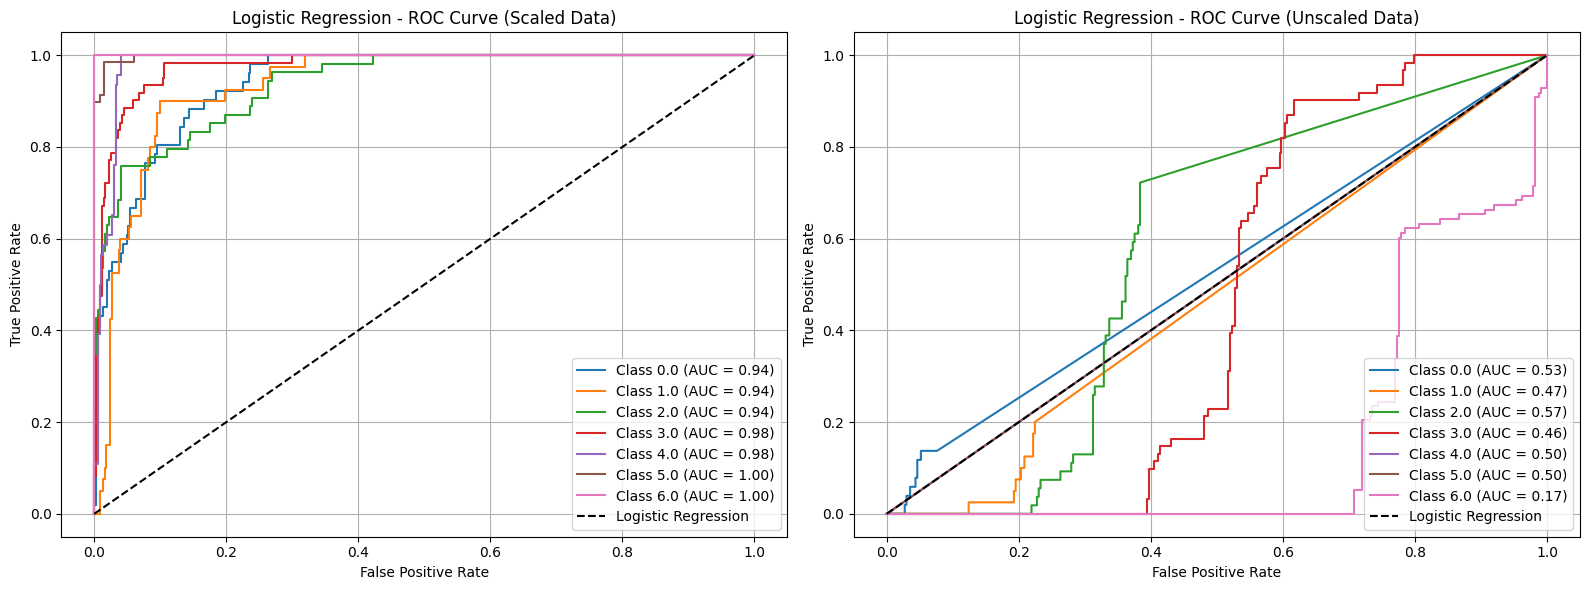

In [135]:
classes = np.unique(y_test)
n_classes = len(classes)

y_test_bin = label_binarize(y_test, classes=classes)
y_score_scaled = log_reg.predict_proba(X_test_scaled)
y_score_unscaled = log_reg.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i in range(n_classes):
    fpr_s, tpr_s, _ = roc_curve(y_test_bin[:, i], y_score_scaled[:, i])
    auc_s = auc(fpr_s, tpr_s)
    ax1.plot(fpr_s, tpr_s, label=f'Class {classes[i]} (AUC = {auc_s:.2f})')

ax1.plot([0, 1], [0, 1], 'k--', label='Logistic Regression')
ax1.set_title('Logistic Regression - ROC Curve (Scaled Data)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc='lower right')
ax1.grid(True)

for i in range(n_classes):
    fpr_u, tpr_u, _ = roc_curve(y_test_bin[:, i], y_score_unscaled[:, i])
    auc_u = auc(fpr_u, tpr_u)
    ax2.plot(fpr_u, tpr_u, label=f'Class {classes[i]} (AUC = {auc_u:.2f})')

ax2.plot([0, 1], [0, 1], 'k--', label='Logistic Regression')
ax2.set_title('Logistic Regression - ROC Curve (Unscaled Data)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.tight_layout()
plt.show()

# **Neural Network ROC Curve**

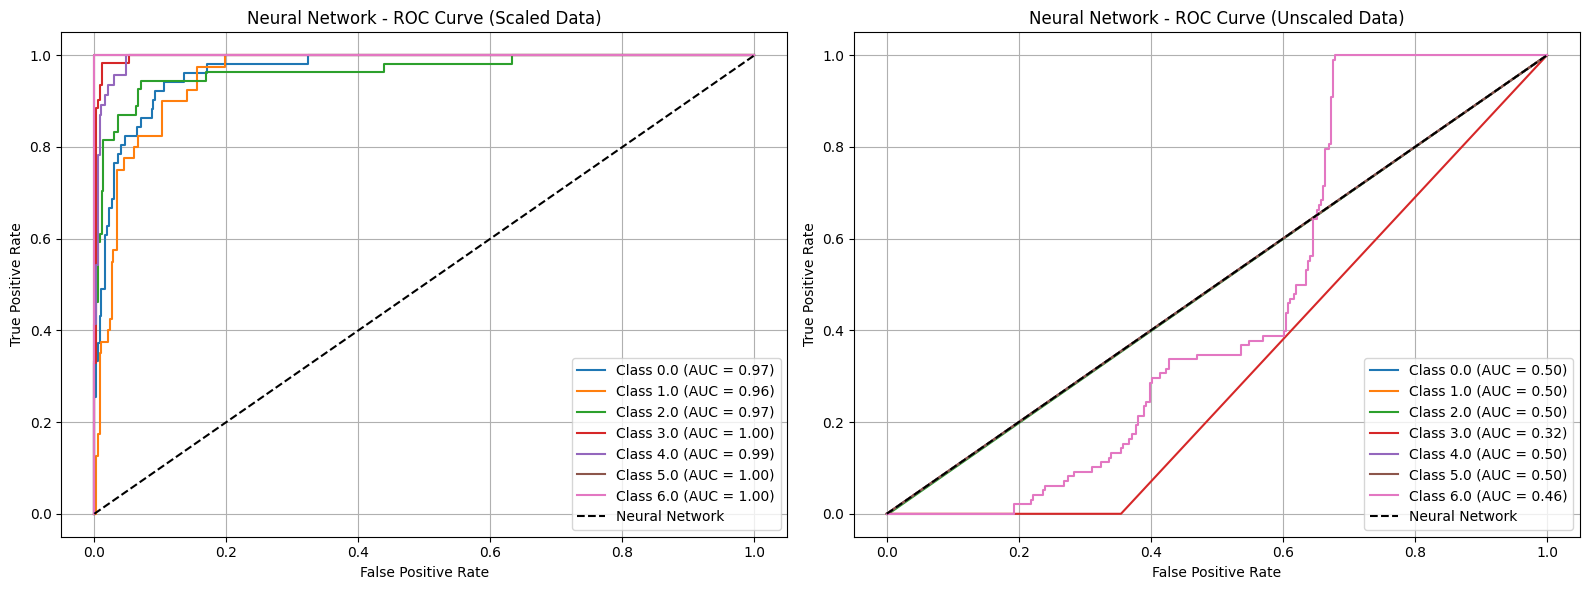

In [136]:
classes = np.unique(y_test)
n_classes = len(classes)

y_test_bin = label_binarize(y_test, classes=classes)
y_score_scaled = mlp.predict_proba(X_test_scaled)
y_score_unscaled = mlp.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i in range(n_classes):
    fpr_s, tpr_s, _ = roc_curve(y_test_bin[:, i], y_score_scaled[:, i])
    auc_s = auc(fpr_s, tpr_s)
    ax1.plot(fpr_s, tpr_s, label=f'Class {classes[i]} (AUC = {auc_s:.2f})')

ax1.plot([0, 1], [0, 1], 'k--', label='Neural Network')
ax1.set_title('Neural Network - ROC Curve (Scaled Data)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc='lower right')
ax1.grid(True)

for i in range(n_classes):
    fpr_u, tpr_u, _ = roc_curve(y_test_bin[:, i], y_score_unscaled[:, i])
    auc_u = auc(fpr_u, tpr_u)
    ax2.plot(fpr_u, tpr_u, label=f'Class {classes[i]} (AUC = {auc_u:.2f})')

ax2.plot([0, 1], [0, 1], 'k--', label='Neural Network')
ax2.set_title('Neural Network - ROC Curve (Unscaled Data)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.tight_layout()
plt.show()

# **Decision Tree ROC Curve**

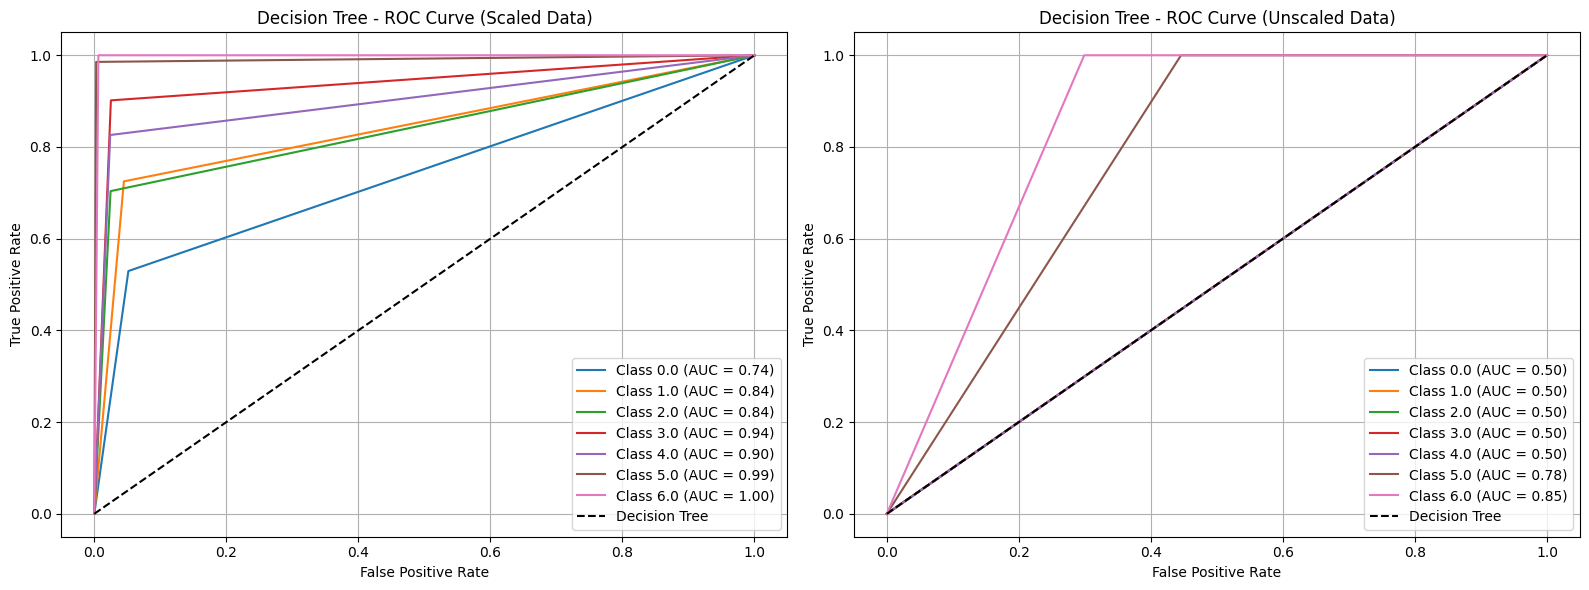

In [137]:
classes = np.unique(y_test)
n_classes = len(classes)

y_test_bin = label_binarize(y_test, classes=classes)
y_score_scaled = DT.predict_proba(X_test_scaled)
y_score_unscaled = DT.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i in range(n_classes):
    fpr_s, tpr_s, _ = roc_curve(y_test_bin[:, i], y_score_scaled[:, i])
    auc_s = auc(fpr_s, tpr_s)
    ax1.plot(fpr_s, tpr_s, label=f'Class {classes[i]} (AUC = {auc_s:.2f})')

ax1.plot([0, 1], [0, 1], 'k--', label='Decision Tree')
ax1.set_title('Decision Tree - ROC Curve (Scaled Data)')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc='lower right')
ax1.grid(True)

for i in range(n_classes):
    fpr_u, tpr_u, _ = roc_curve(y_test_bin[:, i], y_score_unscaled[:, i])
    auc_u = auc(fpr_u, tpr_u)
    ax2.plot(fpr_u, tpr_u, label=f'Class {classes[i]} (AUC = {auc_u:.2f})')

ax2.plot([0, 1], [0, 1], 'k--', label='Decision Tree')
ax2.set_title('Decision Tree - ROC Curve (Unscaled Data)')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc='lower right')
ax2.grid(True)

plt.tight_layout()
plt.show()

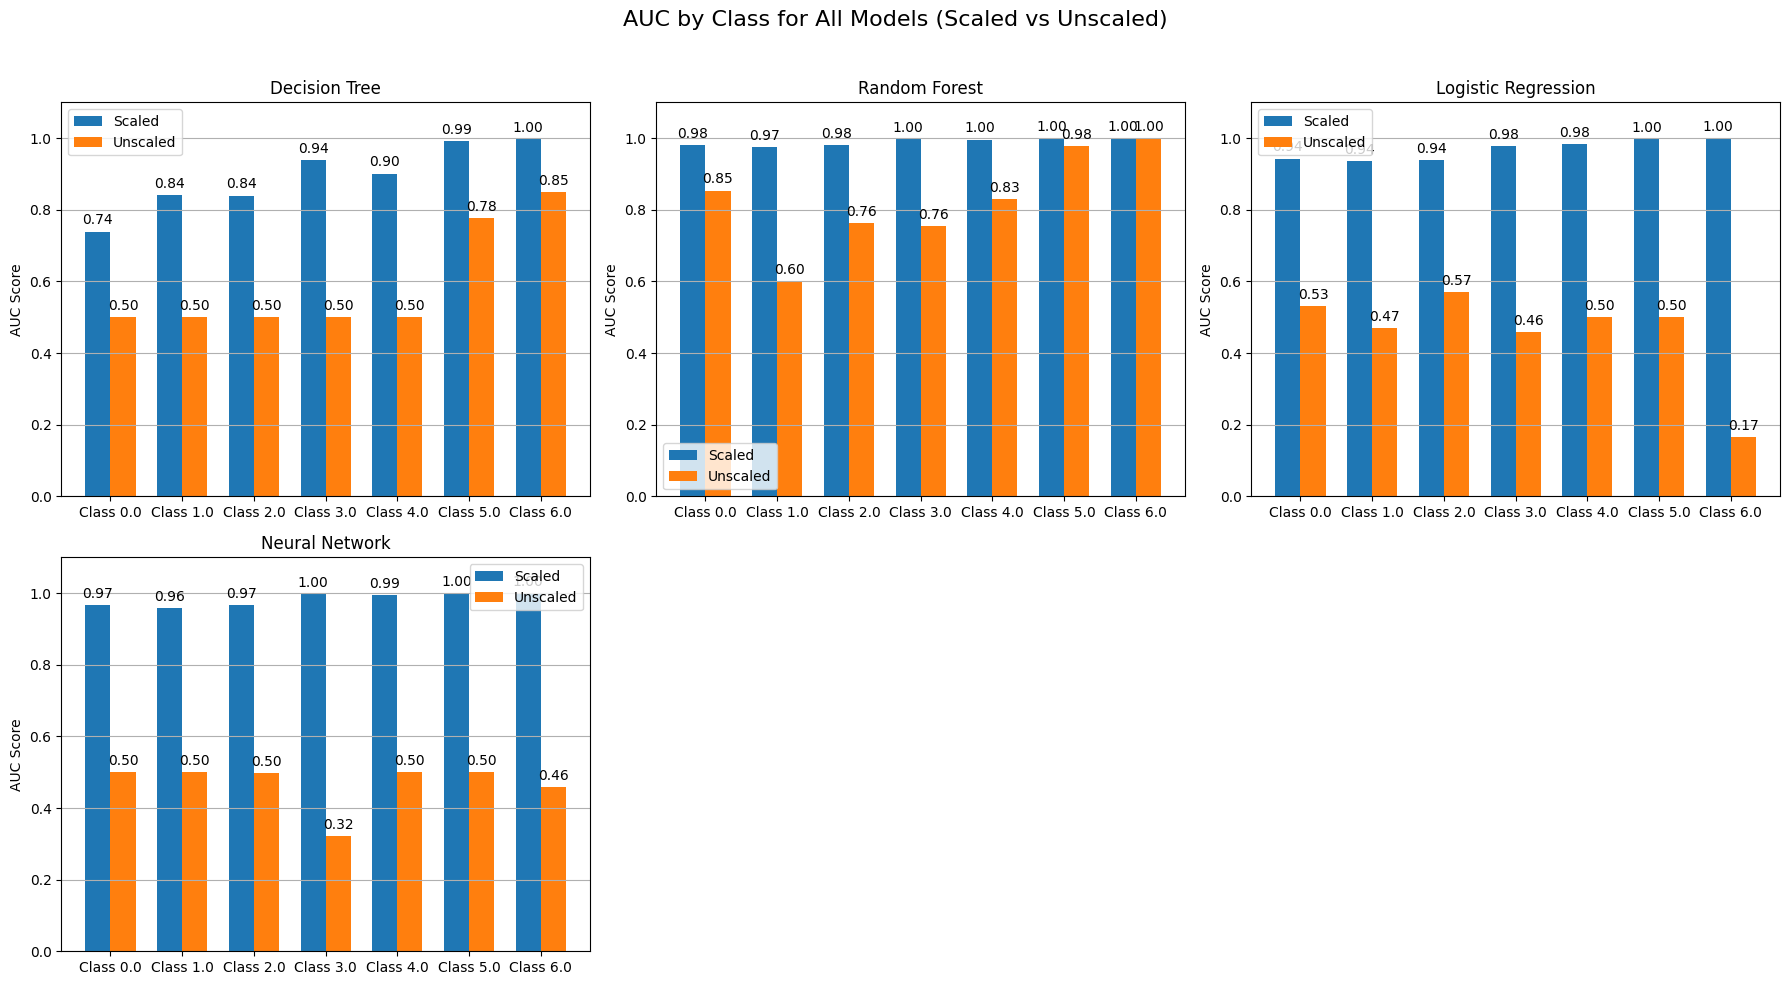

In [138]:
classes = np.unique(y_test)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.ravel()

for i, (name, model) in enumerate(models):
    y_score_scaled = model.predict_proba(X_test_scaled)
    y_score_unscaled = model.predict_proba(X_test)

    auc_scores_scaled = []
    auc_scores_unscaled = []

    for j in range(n_classes):
        fpr_s, tpr_s, _ = roc_curve(y_test_bin[:, j], y_score_scaled[:, j])
        fpr_u, tpr_u, _ = roc_curve(y_test_bin[:, j], y_score_unscaled[:, j])

        auc_s = auc(fpr_s, tpr_s)
        auc_u = auc(fpr_u, tpr_u)

        auc_scores_scaled.append(auc_s)
        auc_scores_unscaled.append(auc_u)

    x = np.arange(n_classes)
    width = 0.35
    ax = axes[i]
    bars1 = ax.bar(x - width/2, auc_scores_scaled, width, label='Scaled')
    bars2 = ax.bar(x + width/2, auc_scores_unscaled, width, label='Unscaled')

    ax.set_title(name)
    ax.set_xticks(x)
    ax.set_xticklabels([f'Class {cls}' for cls in classes])
    ax.set_ylim(0.0, 1.1)
    ax.set_ylabel("AUC Score")
    ax.legend()
    ax.grid(True, axis='y')

    # Annotate bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

if len(models) < 6:
    for j in range(len(models), 6):
        fig.delaxes(axes[j])

plt.suptitle('AUC by Class for All Models (Scaled vs Unscaled)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
